# DATA 620, Project 2

### Group 1 Members:

* Mauricio Alarcon
* Sekhar Mekala 
* Aadi Kalloo
* Srinivasa Illapani
* Param Singh 

### Project Requirements

Identify a large 2-node network dataset—you can start with a dataset in a repository.  

1. Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
3. What can you infer about each of the distinct groups?

You may work in a small group on the project.

Your code and analysis should be delivered in an IPython Notebook by end of day Monday July 3rd. 

## Analyzing Co-Products Using Graph Techniques

The objective of this project is to perform an exploratory analysis of a large 2-node graph consisting of items purchased during a weekend at a major retailer.

We seek to gain insights on:

* Top Rakning Products
* Product Islands/Communities
* Related Product Categories
* Product Recommendations

## Dataset Description

This is a proprietary dataset consisting of 123,716 purchase transactions at a major retailer for a weekend in the month of June. We're representing this transactional dataset ias a bipirtite graph with edges bewtween two node types: Customer Orders (n=16,313) and Products (n=2,167).

The primary focus of analysis is the products network, for which we have a de-identified product name and category. Once we project the graph onto the products, we will be able to analyze co-products and other important metrics.

## Data Loading

In this section we will: 

* Load the data from CSV format into a pandas dataframe 
* Create a Graph using from the pandas dataframe and populate the product attributes


In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import stats
import numpy as np
from prettytable import PrettyTable

In [2]:
prod = pd.read_csv('co-products.csv')
prod.head(n=20)


order_id  product_id                    product_desc  \
0   10185341     3314604                   CHERRIES BULK   
1   10244355      472832     REP2 SUM FRSH HAM SERV DELI   
2   10244547     1013780        REP2 SUM FRESH SODA DELI   
3   10401922     1921107             MILK PCC RFRG DAIRY   
4   10411766     2542615                AIR CARE CANDLES   
5   10414438      509272         PASTRIES SUM FRZ BAKERY   
6   10432453     2876259                         KETCHUP   
7   10558119     2892515         APPLESAUCE SINGLE SERVE   
8   10615817     1457537  COATED SEASONED POPCORN SNACKS   
9   10658392      790193                    EGGPLANT FRH   
10  10697639     1921107             MILK PCC RFRG DAIRY   
11  10704779     1753852                   ALUMINUM FOIL   
12  10709022     1652380           MANUAL DISH DETERGENT   
13  10818634     2258594           ALL FAMILY RTE CEREAL   
14  10881674     1657966     MILK ALTERNATIVE RFRG DAIRY   
15  10893873     1817120       VALUE PIZZA MULTI SRV FRZ   
16  10906232     1848094      ALL FAMILY POWDERED DRINKS   
17  11004308     2679694                   ROMA TOMATOES   
18  11030560     1676772                    BROCCOLI FRZ   
19  11044888      374518                   SALAD SPINACH   

                     cat_desc  
0                    CHERRIES  
1          DELI SERVICE MEATS  
2               DELI BEVERAGE  
3    MILK CONVNTNL RFRG DAIRY  
4                    AIR CARE  
5          BAKERY SWEET GOODS  
6                     KETCHUP  
7              PACKAGED FRUIT  
8                SALTY SNACKS  
9              DRY VEGETABLES  
10   MILK CONVNTNL RFRG DAIRY  
11               FOOD STORAGE  
12             DISH DETERGENT  
13        READY TO EAT CEREAL  
14  MILK SPECIALTY RFRG DAIRY  
15               FROZEN PIZZA  
16             BEVERAGE MIXES  
17                   TOMATOES  
18          FROZEN VEGETABLES  
19                     SALADS

In [3]:
print(prod.shape)

(123716, 4)


Let's now extract the list of procut and order nodes. For the product nodes we will preserve the description and category attributes.

In [4]:
order_nodes  = prod[['order_id']].drop_duplicates()
unique_products  = prod[['product_id','product_desc','cat_desc']].drop_duplicates()
print 'Unique Orders: ' + str(len(order_nodes))
print 'Unique Products: '+ str(len(unique_products))

Unique Orders: 16313
Unique Products: 2167


In [5]:
product_nodes = unique_products.product_id.unique
product_nodes_attr = unique_products[['product_desc','cat_desc']].to_dict().values()

And now, let's create the Order-Product graph:

In [6]:
K = nx.from_pandas_dataframe(prod,'order_id','product_id',create_using=nx.DiGraph())

In [42]:
print(nx.info(K))

Name: 
Type: DiGraph
Number of nodes: 18480
Number of edges: 123716
Average in degree:   6.6946
Average out degree:   6.6946


In [7]:
len(K.edges())

123716

and populate the product attributes

In [8]:
nx.set_node_attributes(K, 'type', pd.Series('order', index=order_nodes.order_id).to_dict())
nx.set_node_attributes(K, 'type', pd.Series('product', index=unique_products.product_id).to_dict())

x = unique_products.product_desc
x.index = unique_products.product_id
nx.set_node_attributes(K, 'product_desc', x.to_dict())


x = unique_products.cat_desc
x.index = unique_products.product_id
nx.set_node_attributes(K, 'cat_desc', x.to_dict())


Let's now calculate and compare the degree centrality and pagerank on the order-products graph and dump the results into a pandas dataframe:

In [9]:
# Rank elements of network using degree centrality
dc = nx.degree(K)
# set the node attribute
nx.set_node_attributes(K, 'degree_centrality_op', dc)

# Rank elements of network using pagerank
pr = nx.pagerank(K)
# set the node attribute
nx.set_node_attributes(K, 'pagerank_op', pr)


Let's now look at the category rankings for the products, looking at the top 20 by degree centrality and pagerank: 

In [10]:
#pull out all the nodes and convert to pandas DF
nodes = K.nodes(data=True)
df = pd.DataFrame([node[1] for node in nodes])
df.id = [node[0] for node in nodes]
df.sort_values(by='degree_centrality_op',ascending=False).head(20)


cat_desc  degree_centrality_op  pagerank_op  \
6724                         BANANAS                  2140     0.005717   
11489       MILK CONVNTNL RFRG DAIRY                  1802     0.005038   
14085                        BERRIES                  1373     0.003328   
186                     SALTY SNACKS                  1109     0.003290   
4653        EGGS CONVNTNL RFRG DAIRY                  1096     0.002449   
14977                       BREAD SS                  1048     0.002547   
9854         BUNS AND ROLLS BREAD SS                   991     0.002519   
14674  SHREDS AND CHUNKS PKGD CHEESE                   967     0.001692   
8375                    SALTY SNACKS                   965     0.002346   
10752                      ICE CREAM                   900     0.003340   
4325                       CUCUMBERS                   879     0.001520   
10899                        BERRIES                   879     0.002163   
2808                        CHERRIES                   871     0.002641   
506       ABOVE PREMIUM QUALITY BEER                   811     0.005365   
13277                 WET VEGETABLES                   804     0.001922   
5949                          MELONS                   769     0.002088   
13929              ONIONS AND GARLIC                   752     0.001430   
6421               YOGURT RFRG DAIRY                   741     0.001719   
8097          CARBONATED SOFT DRINKS                   736     0.009241   
2967                           WATER                   700     0.003330   

                         product_desc     type  
6724                     BANANAS BULK  product  
11489             MILK PCC RFRG DAIRY  product  
14085                STRAWBERRIES FRH  product  
186                      POTATO CHIPS  product  
4653         EGGS CONVNTNL RFRG DAIRY  product  
14977               EVERYDAY BREAD SS  product  
9854   HAMBURGER HOTDOG BUNS BREAD SS  product  
14674        SHREDDED PACKAGED CHEESE  product  
8375      NACHOS ROUND TORTILLA CHIPS  product  
10752                       ICE CREAM  product  
4325               CUCUMBERS PACKAGED  product  
10899                 RASPBERRIES FRH  product  
2808                    CHERRIES BULK  product  
506                        CRAFT BEER  product  
13277                   ASPARAGUS SUM  product  
5949                       WATERMELON  product  
13929                     ONIONS BULK  product  
6421                 GREEK RFRG DAIRY  product  
8097      SGL SRV BTLE CARB SFT DRINK  product  
2967         WATER SNGL SRV MULTIPACK  product

In [11]:
df[df.type=='product'].sort_values(by='pagerank_op',ascending=False).head(20)

cat_desc  degree_centrality_op  pagerank_op  \
5973                   CIGARETTES                   552     0.011349   
8097       CARBONATED SOFT DRINKS                   736     0.009241   
6724                      BANANAS                  2140     0.005717   
17320               DELI BEVERAGE                   346     0.005383   
506    ABOVE PREMIUM QUALITY BEER                   811     0.005365   
14763        ALTERNATIVE BEVERAGE                   408     0.005333   
11489    MILK CONVNTNL RFRG DAIRY                  1802     0.005038   
14787                       WATER                   364     0.004594   
5003                          ICE                   301     0.004038   
12788          FRANCHISE BEVERAGE                   162     0.003497   
10752                   ICE CREAM                   900     0.003340   
1002           FRANCHISE BEVERAGE                   168     0.003340   
2967                        WATER                   700     0.003330   
13572  CANDY GUM AND MINTS SINGLE                   382     0.003329   
14085                     BERRIES                  1373     0.003328   
186                  SALTY SNACKS                  1109     0.003290   
11732               BAKERY DONUTS                   366     0.003257   
5039   CANDY GUM AND MINTS SINGLE                   394     0.003205   
12576      CARBONATED SOFT DRINKS                   690     0.003096   
6316         ALTERNATIVE BEVERAGE                   458     0.003071   

                         product_desc     type  
5973    CARTON SINGLE PACK CIGARETTES  product  
8097      SGL SRV BTLE CARB SFT DRINK  product  
6724                     BANANAS BULK  product  
17320        REP2 SUM FRESH SODA DELI  product  
506                        CRAFT BEER  product  
14763                   ENERGY DRINKS  product  
11489             MILK PCC RFRG DAIRY  product  
14787              WATER SINGLE SERVE  product  
5003                              ICE  product  
12788  SUM ICED LATTE TEA FRAPPUCCINO  product  
10752                       ICE CREAM  product  
1002                 SUM BEV ESPRESSO  product  
2967         WATER SNGL SRV MULTIPACK  product  
13572          CHOCOLATE SINGLE CANDY  product  
14085                STRAWBERRIES FRH  product  
186                      POTATO CHIPS  product  
11732           DONUTS SUM FRZ BAKERY  product  
5039                       GUM SINGLE  product  
12576     MLT SRV BTLE CARB SFT DRINK  product  
6316               READY TO DRINK TEA  product

In [37]:
prod[prod.order_id.isin(prod[prod.product_desc=='CARTON SINGLE PACK CIGARETTES'].order_id.tolist())].sort_values(by='order_id')

order_id  product_id                    product_desc  \
87378   10018395     2645412           WATER BULK MULTISERVE   
80126   10018395      895195             LIGHT DOMESTIC BEER   
111347  10018395     2876259                         KETCHUP   
96204   10018395     3054576      BELOW PREMIUM QUALITY BEER   
63612   10018395     1725953  REP2 DTL FRSH PASTA SALAD DELI   
100656  10018395      676569  REP2 DTL FRSH POTAT SALAD DELI   
88737   10018395     3041064                   ENERGY DRINKS   
8547    10018395     2325557               MUSTARD SPECIALTY   
52865   10018395      795574                             ICE   
46841   10018395     1784548            ISOTONIC SINGLE SERV   
65417   10018395     1344354                   KIDS SS JUICE   
47878   10031078      795574                             ICE   
44112   10036707     2090636              WATER SINGLE SERVE   
31739   10036707      895195             LIGHT DOMESTIC BEER   
90833   10036707      795574                             ICE   
21777   10036707     2093351   NATURAL SLICE PACKAGED CHEESE   
1911    10036707     2196361                      CRAFT BEER   
82820   10036707      679548  REP2 SUM FRSH DRY MT SERV DELI   
91228   10036707      999041  REP2 SUM FRSH TURKEY SERV DELI   
80062   10036707     2297979             OTHER APPETIZER FRZ   
25897   10036707     1817120       VALUE PIZZA MULTI SRV FRZ   
34107   10041764      795574                             ICE   
96749   10057236      795574                             ICE   
36929   10058817     1914643                 CUPS DISPOSABLE   
81541   10058817     2196361                      CRAFT BEER   
21778   10058817      336484             PKGD MT FRANKS MEAT   
44581   10058817      604479                ORANGES PACKAGED   
53052   10058817      795574                             ICE   
91096   10071172     2196361                      CRAFT BEER   
10492   10071172      795574                             ICE   
...          ...         ...                             ...   
91347   13343836     1357782   BUTTER SPRAYED CRACKER SNACKS   
91906   13343836      774852             TOFU SOY VEGETARIAN   
91774   13362717      795574                             ICE   
8670    13366873      795574                             ICE   
105122  13366873     3427810                  VODKA FLAVORED   
4912    13372585     1723849           REGULAR DOMESTIC BEER   
87643   13372585      112996             FLAVORED RICE MIXES   
8488    13372585      535235                 SEASONING MIXES   
109511  13372585      235392             PKGD MT LMT CMBN PK   
75855   13372585      795574                             ICE   
70192   13388064      795574                             ICE   
74794   13388125     3033254      DRESSING WHIPPED SPOONABLE   
34514   13388125     2090636              WATER SINGLE SERVE   
57559   13388125     2564208                  MUSTARD YELLOW   
106949  13388125      922836        WATER SNGL SRV MULTIPACK   
106034  13388125     1784548            ISOTONIC SINGLE SERV   
15017   13388125     3072708             PKGD MT FAMILY PACK   
92098   13388125     2160307                    PKGD MT PEGS   
32970   13388125      795574                             ICE   
5554    13388390     1227048     SGL SRV BTLE CARB SFT DRINK   
64013   13388390     3155800    MILK SINGLE SERVE RFRG DAIRY   
10935   13388390      795574                             ICE   
18436   13388390      922836        WATER SNGL SRV MULTIPACK   
82224   13389512      795574                             ICE   
121834  13389512     3122192              CABERNET SAUVIGNON   
77768   13389512      890818                        DOG TOYS   
64090   13389512     2224513             MATTRESS PROTECTORS   
20233   13400396      795574                             ICE   
31431   13400465      795574                             ICE   
18808   13434822      795574                             ICE   

                          cat_desc  
87

## Product Islands

Let's look for islands in the product-product projection of the Graph. Before that, let's convert the graph to undirected and obtain the Product-Product projection

In [12]:
from networkx.algorithms import bipartite

K_ud = K.to_undirected()

# and get the connected components
P = bipartite.weighted_projected_graph(K_ud, unique_products.product_id.tolist())
P.edges(data=True)[0:5]

P_components = list(nx.connected_component_subgraphs(P))

#G = bipartite.weighted_projected_graph(K_ud, bottom_nodes)
#G.edges(data=True)[0:5]


In [43]:
print(nx.info(P))

Name: 
Type: Graph
Number of nodes: 2167
Number of edges: 288221
Average degree: 266.0092


In [34]:
def trim_edges( g, weight = 1): 
    g2 = nx.Graph() 
    for f, to, edata in g.edges( data = True): 
        if edata['weight'] > weight: 
            g2. add_edge( f, to, edata) 
    return g2

def island_method( g, iterations = 5): 
    weights = [edata['weight'] for f, to, edata in g.edges( data = True)] 
    mn = int( min( weights)) +50
    mx = int( max( weights)) 
    #compute the size of the step, so we get a reasonable step in iterations 
    step = int(( mx-mn)/ iterations) 
    return [[ threshold, trim_edges( g, threshold)] for threshold in [5,20,50,200,350,450]]#range( mn, mx, step)]

In [41]:
#for i in [island_method(p) for p in P_components]
islands = island_method(P_components[0],4)


In [40]:
def displayIslands(islands):
    for i in islands:
        # print the threshold level, size of the graph, and number of connected components ... \
        I_cc =  list( nx.connected_component_subgraphs( i[1]))
        print i[ 0], len( i[ 1]), len(I_cc)
        for I in I_cc:
            labels = {}
            for node in I.nodes(data=True):
                labels.update({node[0]:unique_products[unique_products.product_id==node[0]].product_desc.tolist()[0]})

            weights = [i[2].get('weight')*50 for i in I.edges(data=True)] 

            plt.figure(figsize=(20,20))
            pos = None
            if (len( I)>225):
                pos=nx.drawing.spring_layout(I)
            else: 
                pos=nx.drawing.circular_layout(I)
            nx.draw(I, pos, cmap=plt.get_cmap('jet'), node_size=weights, with_labels=True, labels=labels,alpha=0.5)




5 939 9
20 485 3
50 221 1
200 29 1
350 7 1


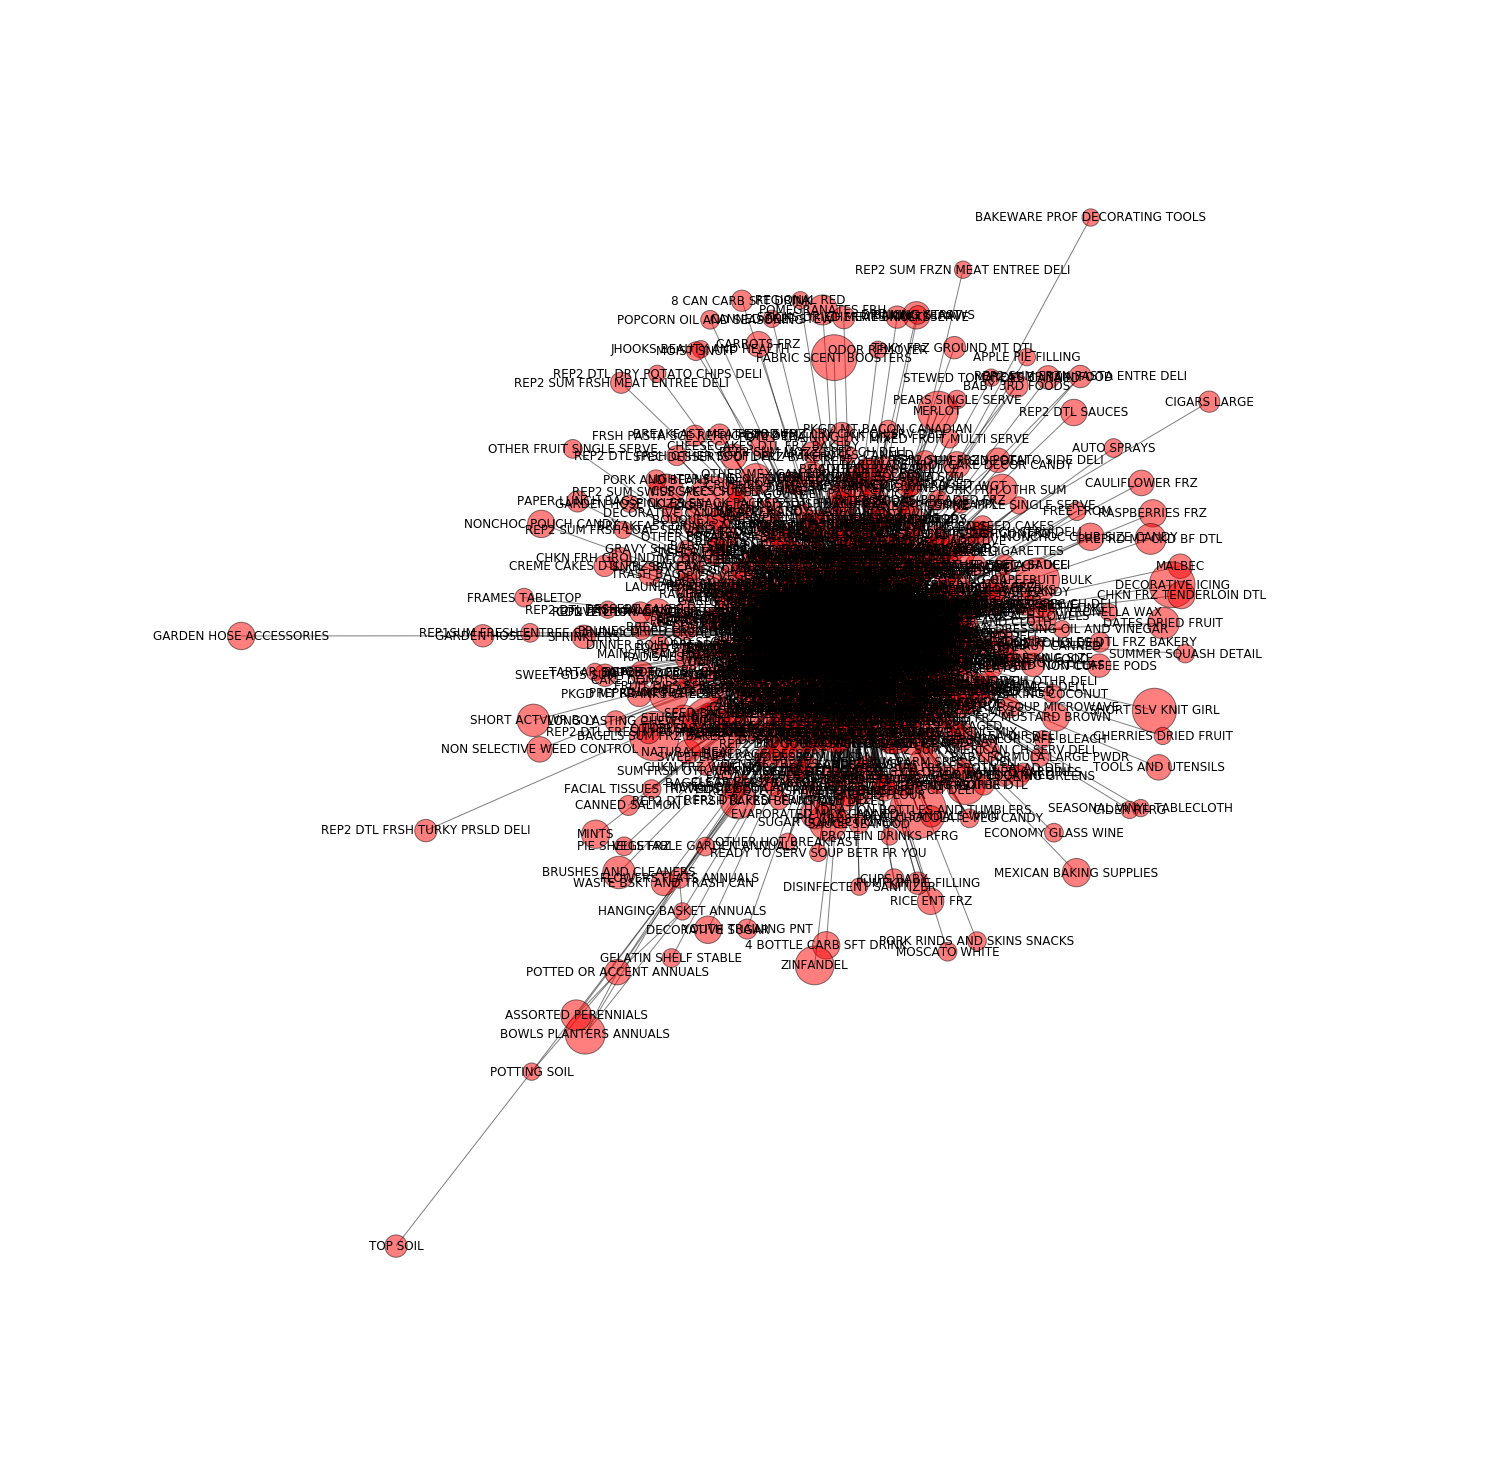

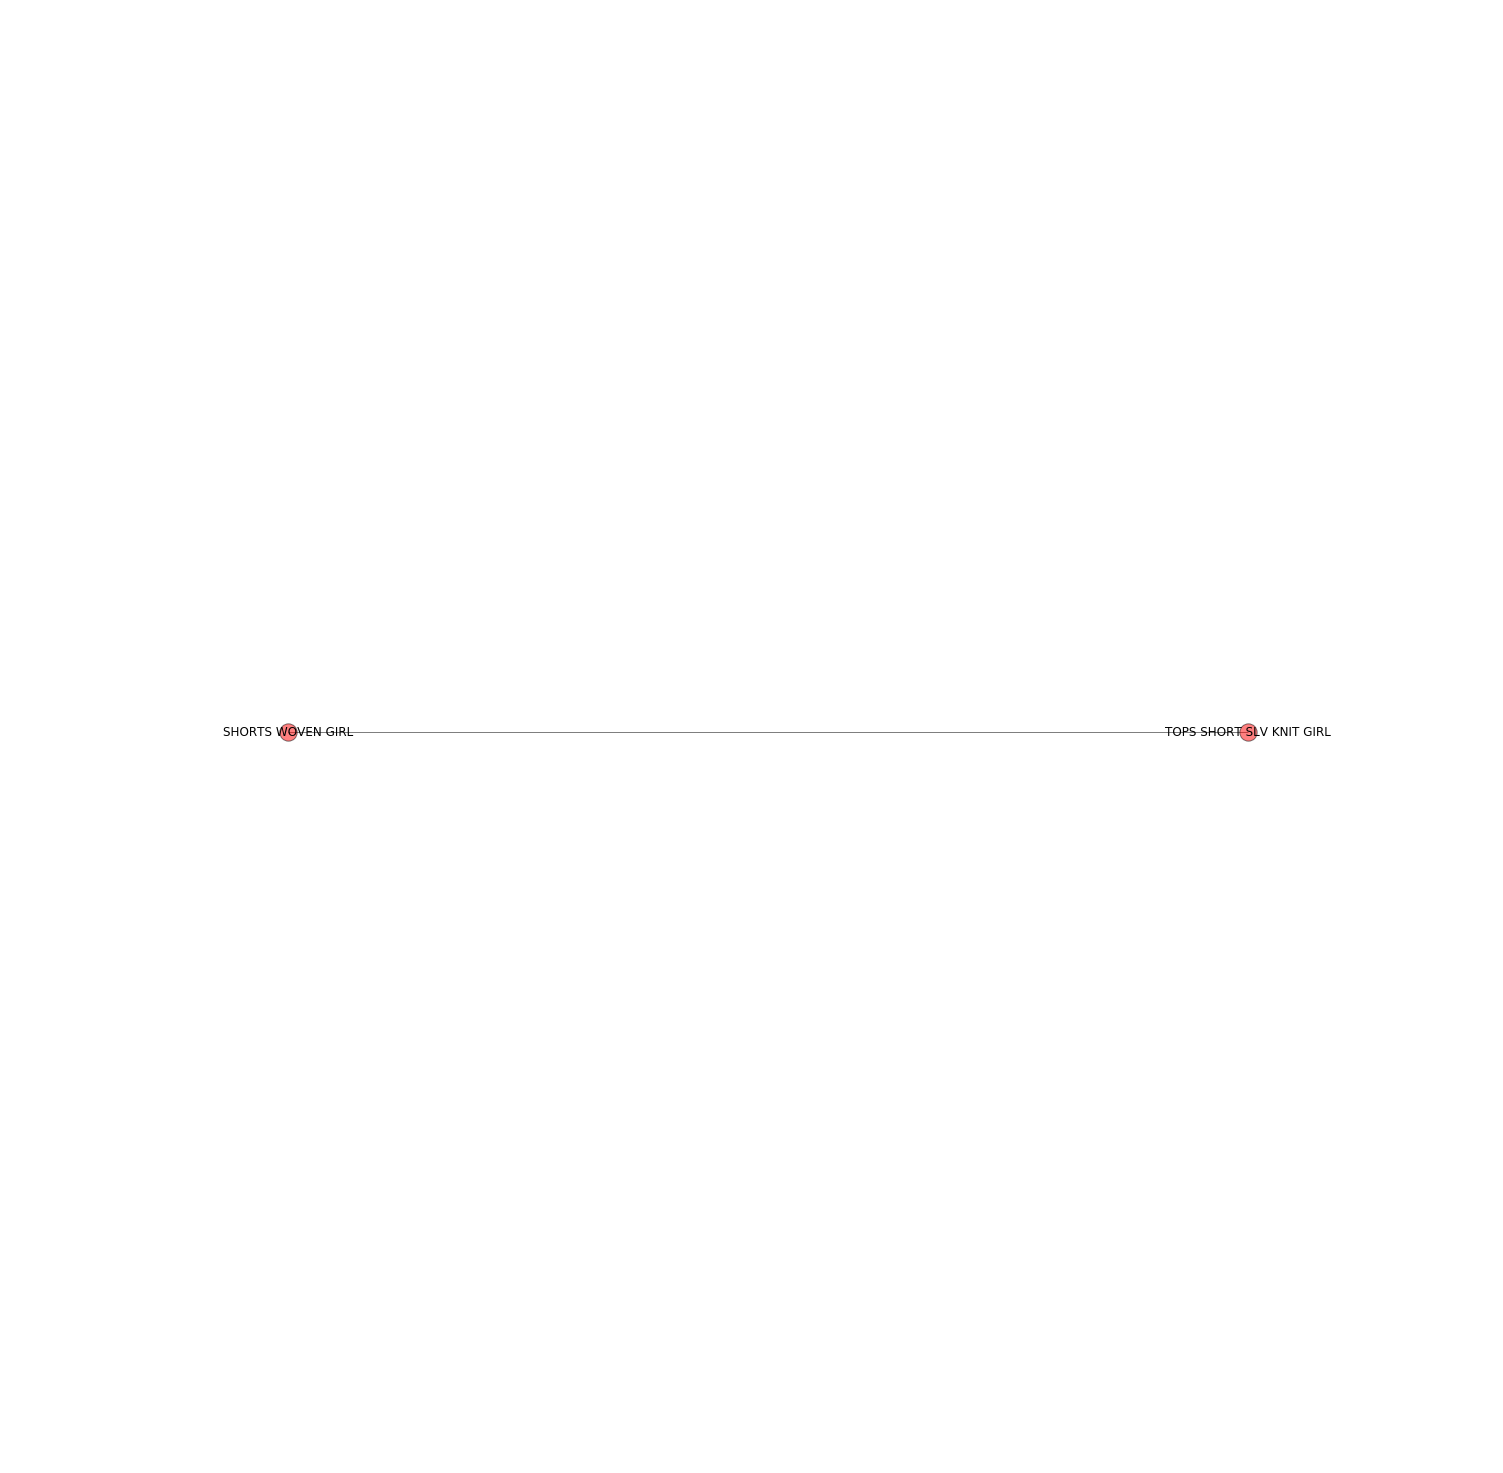

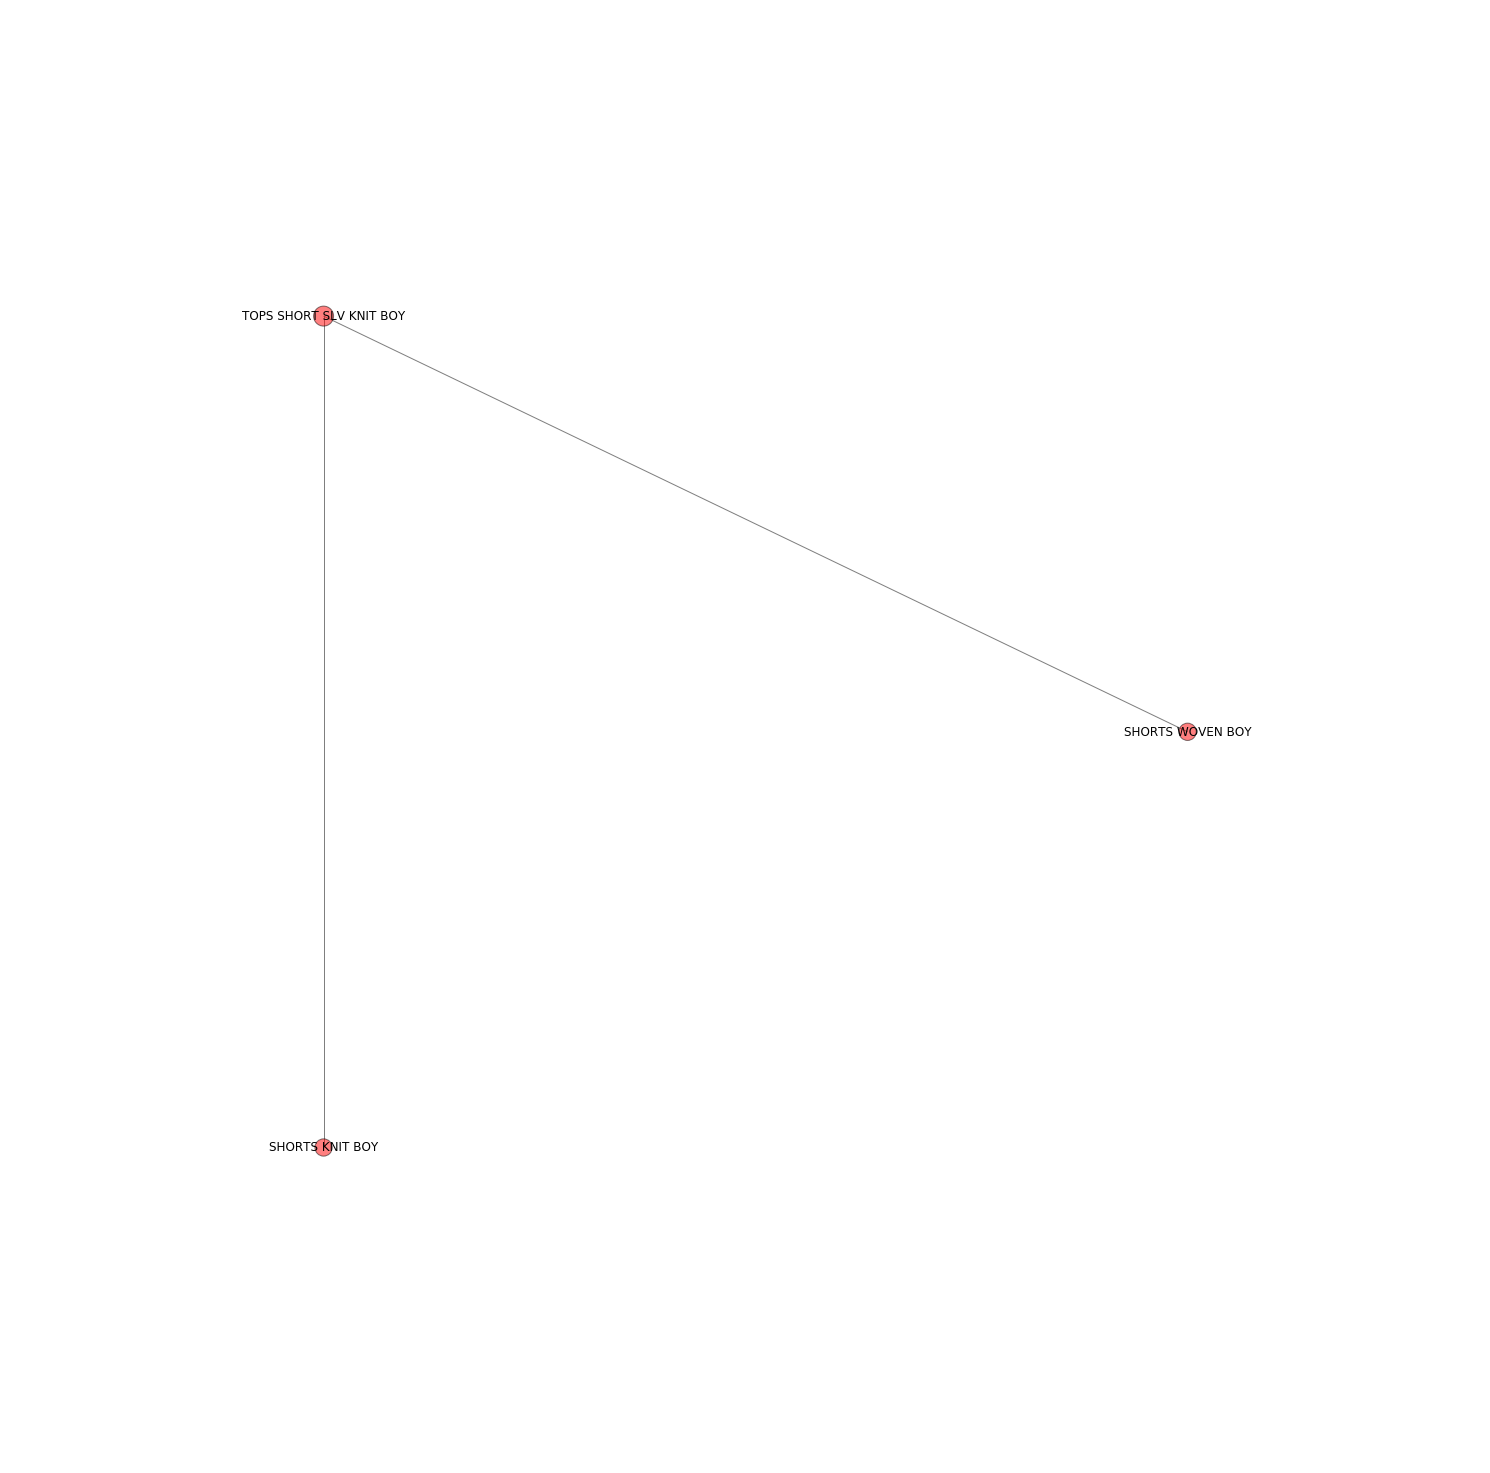

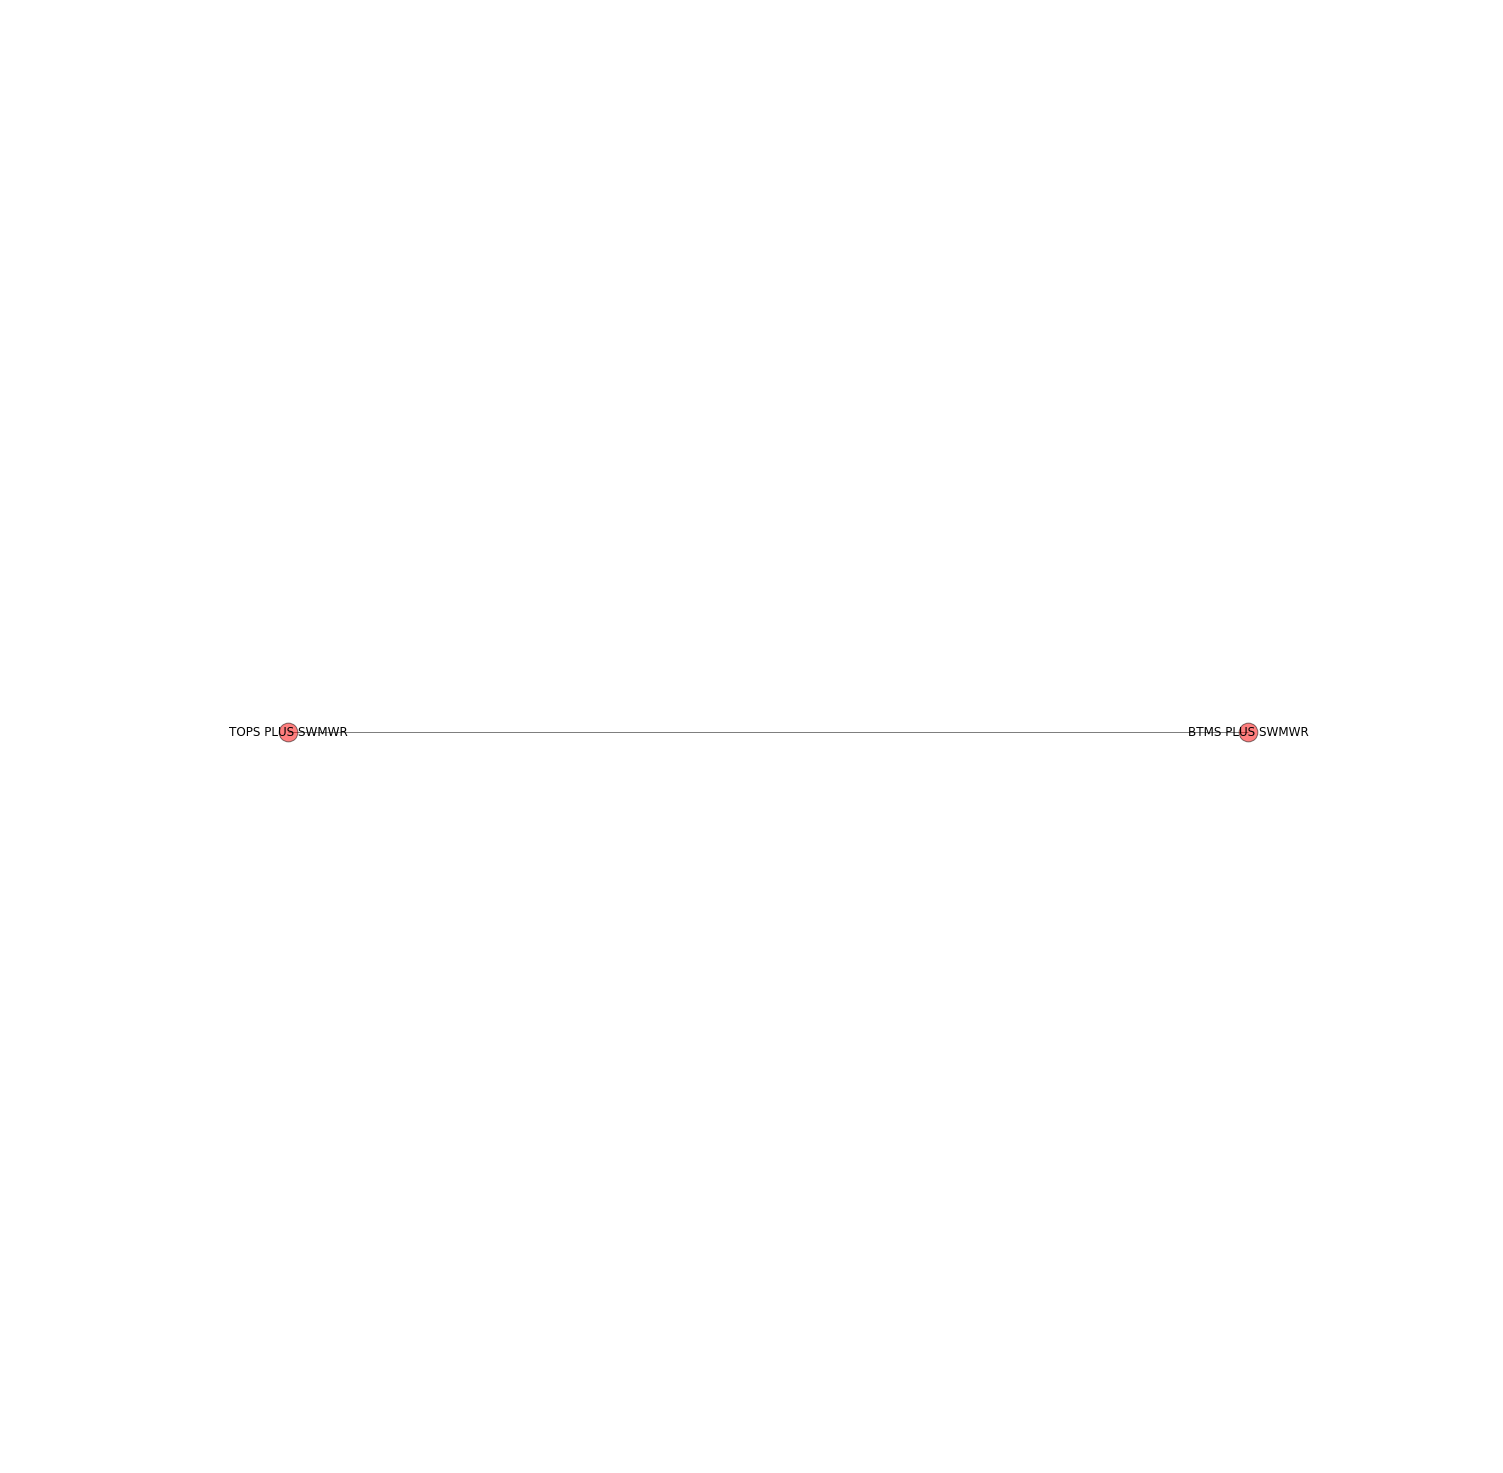

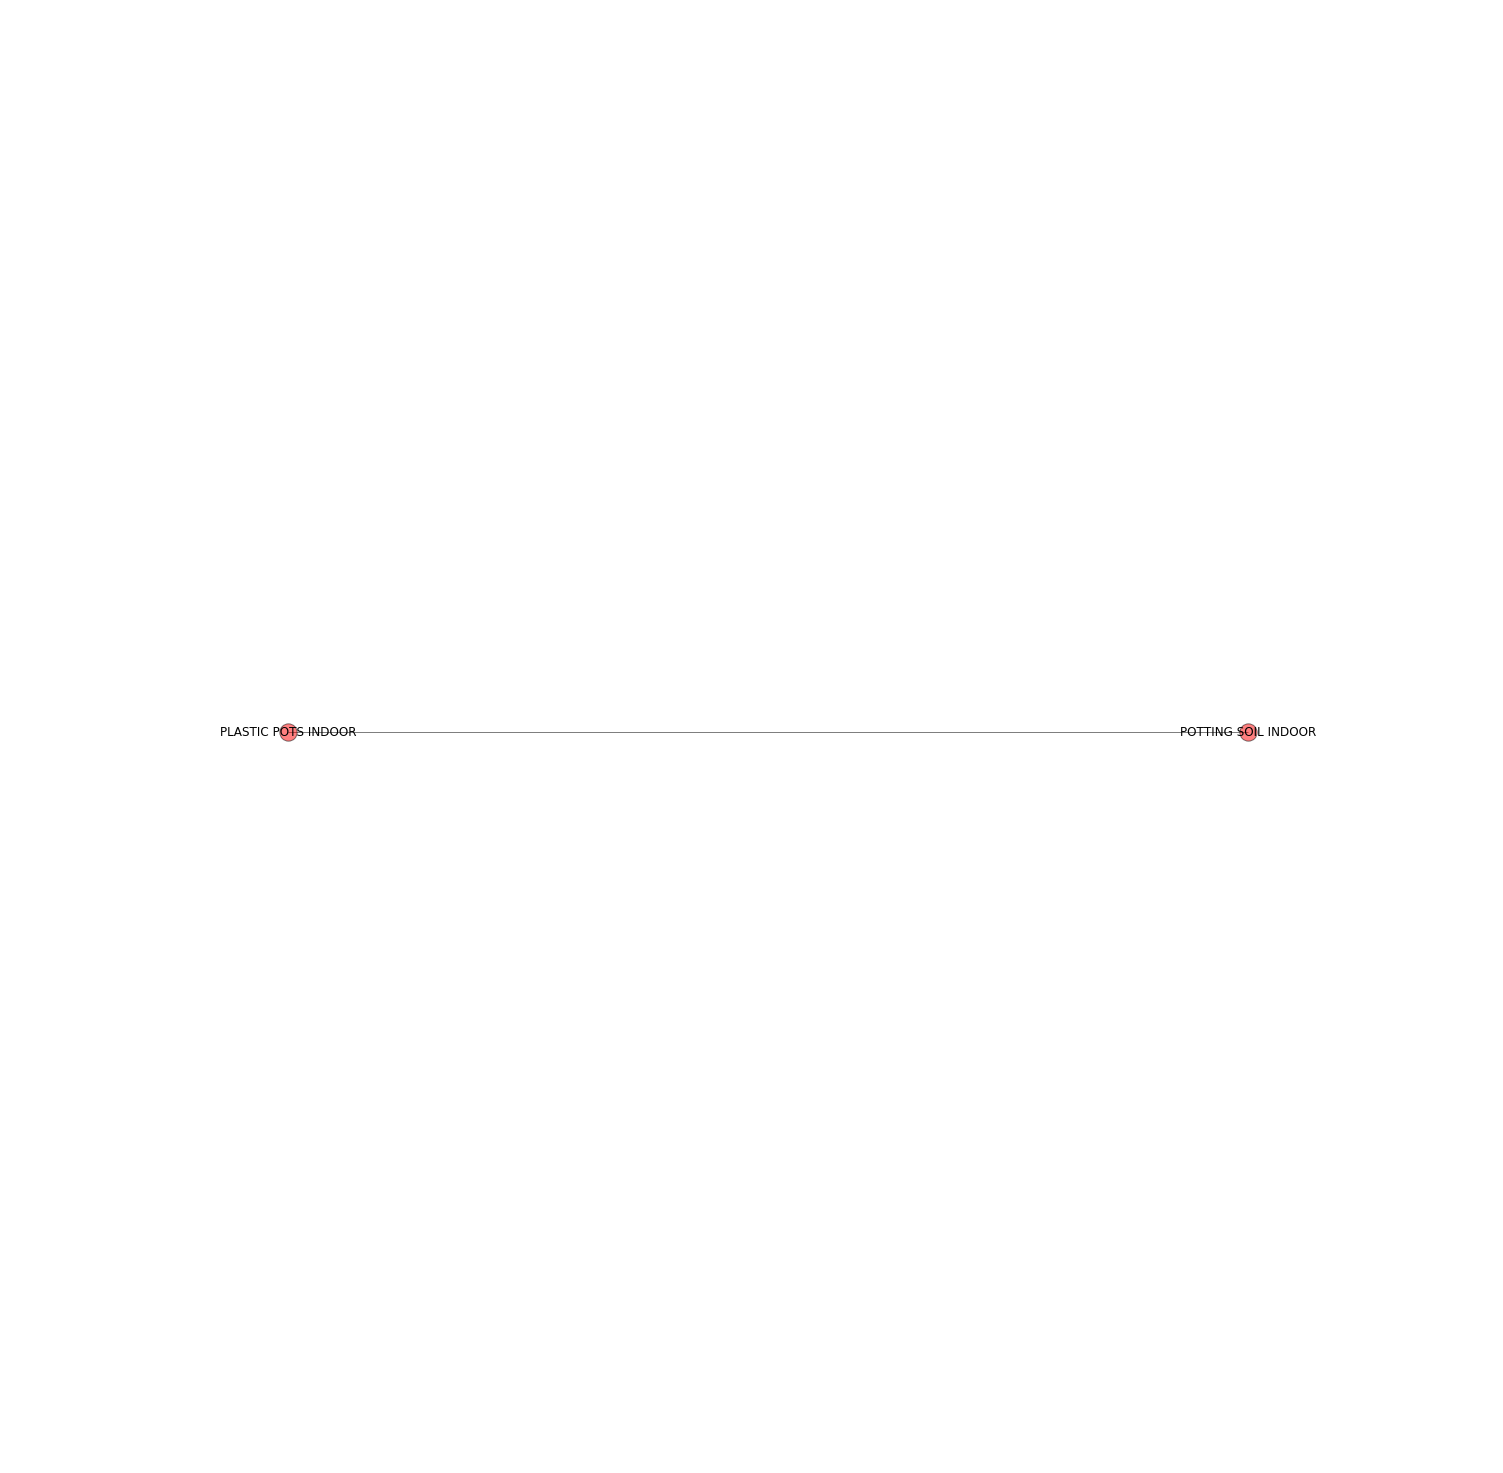

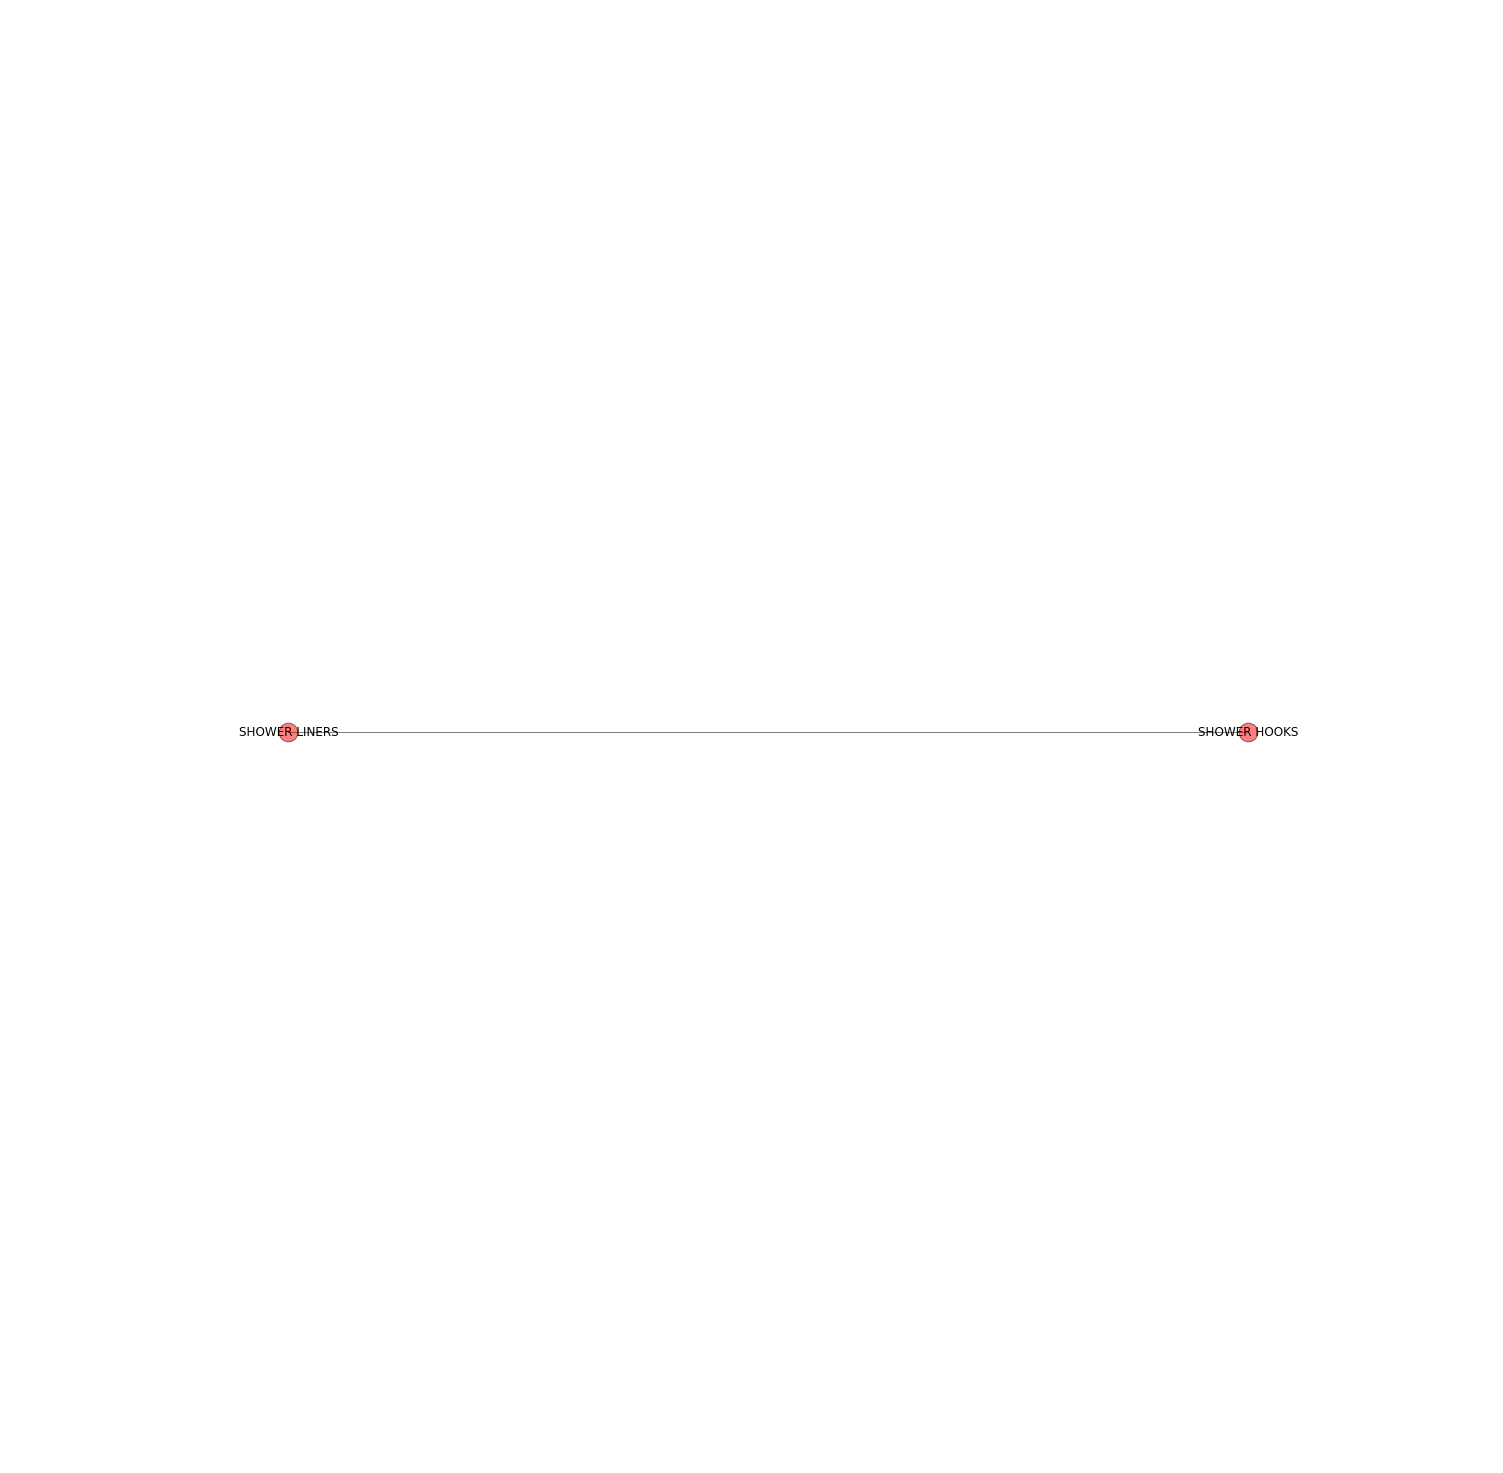

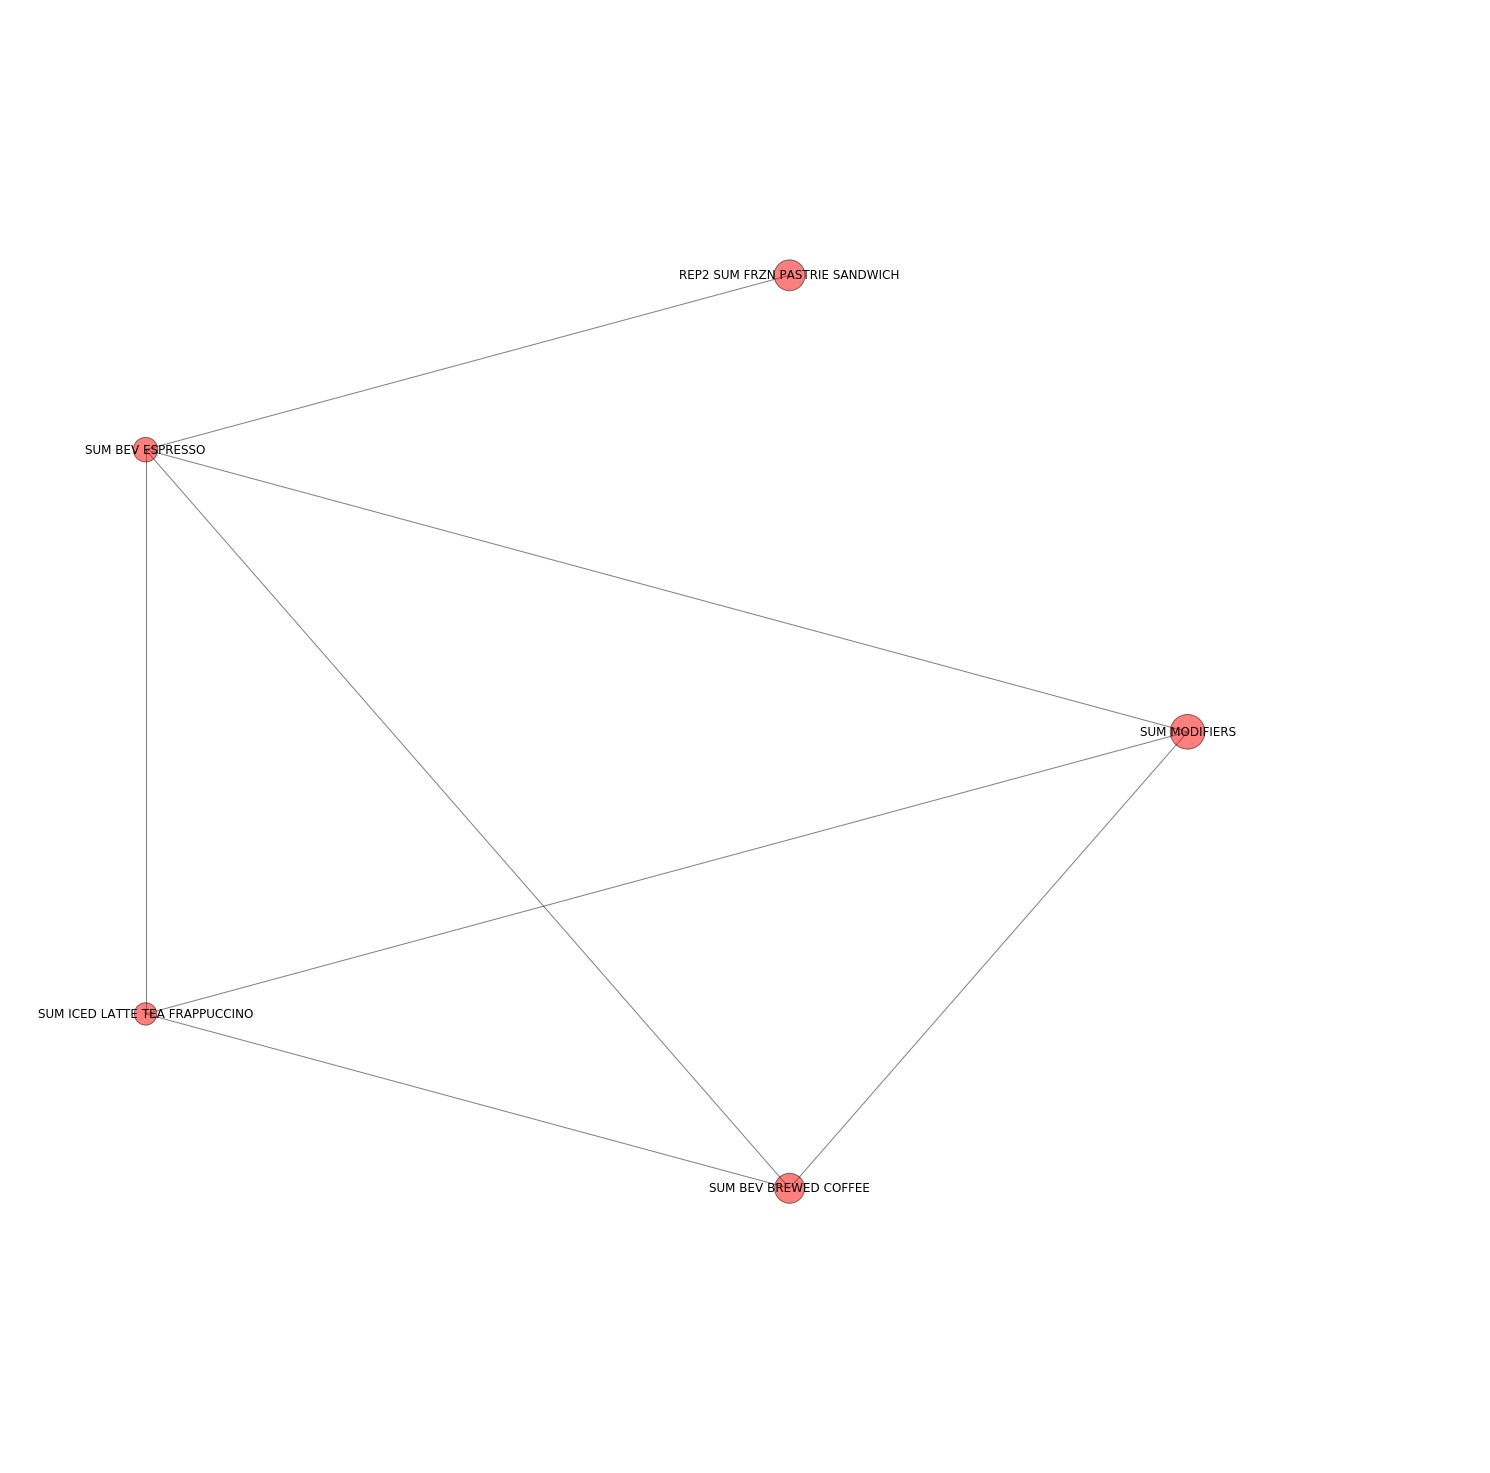

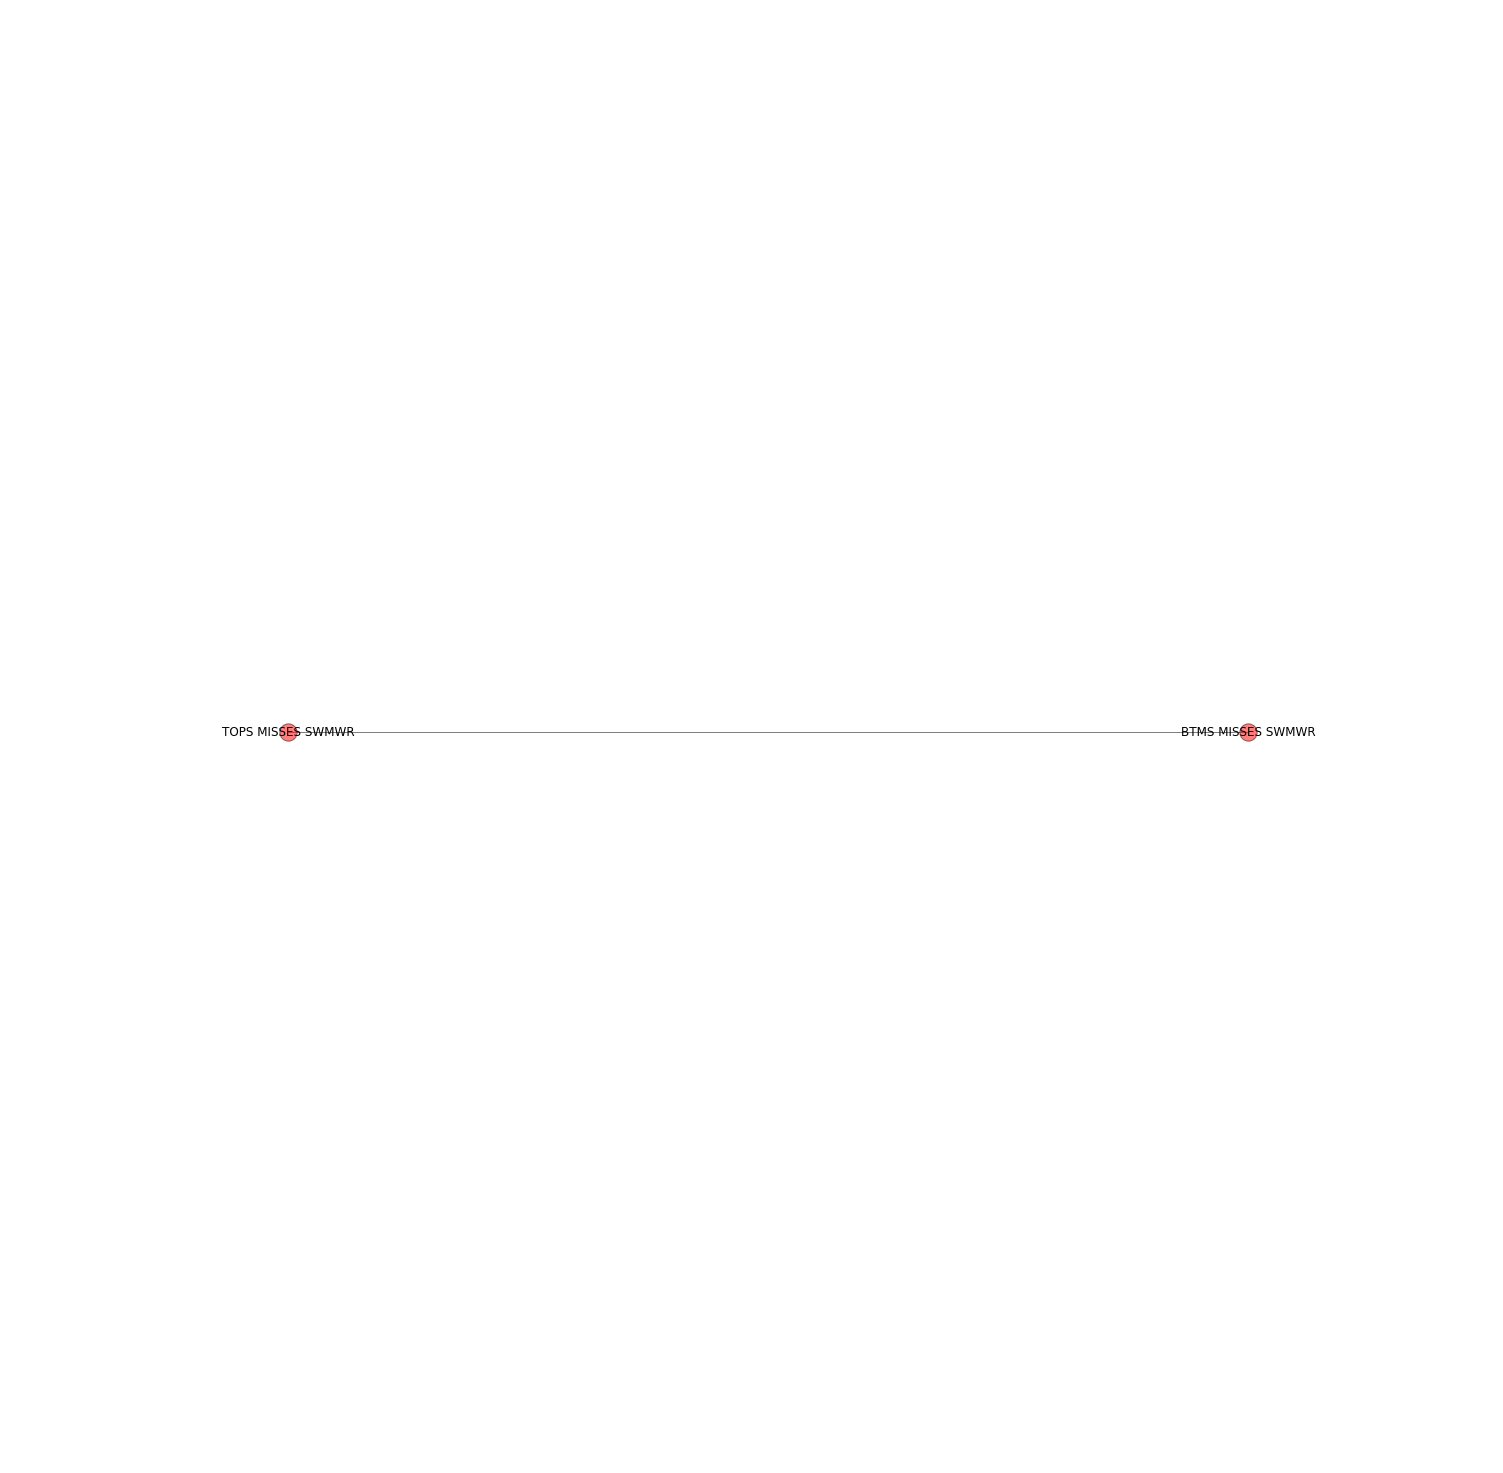

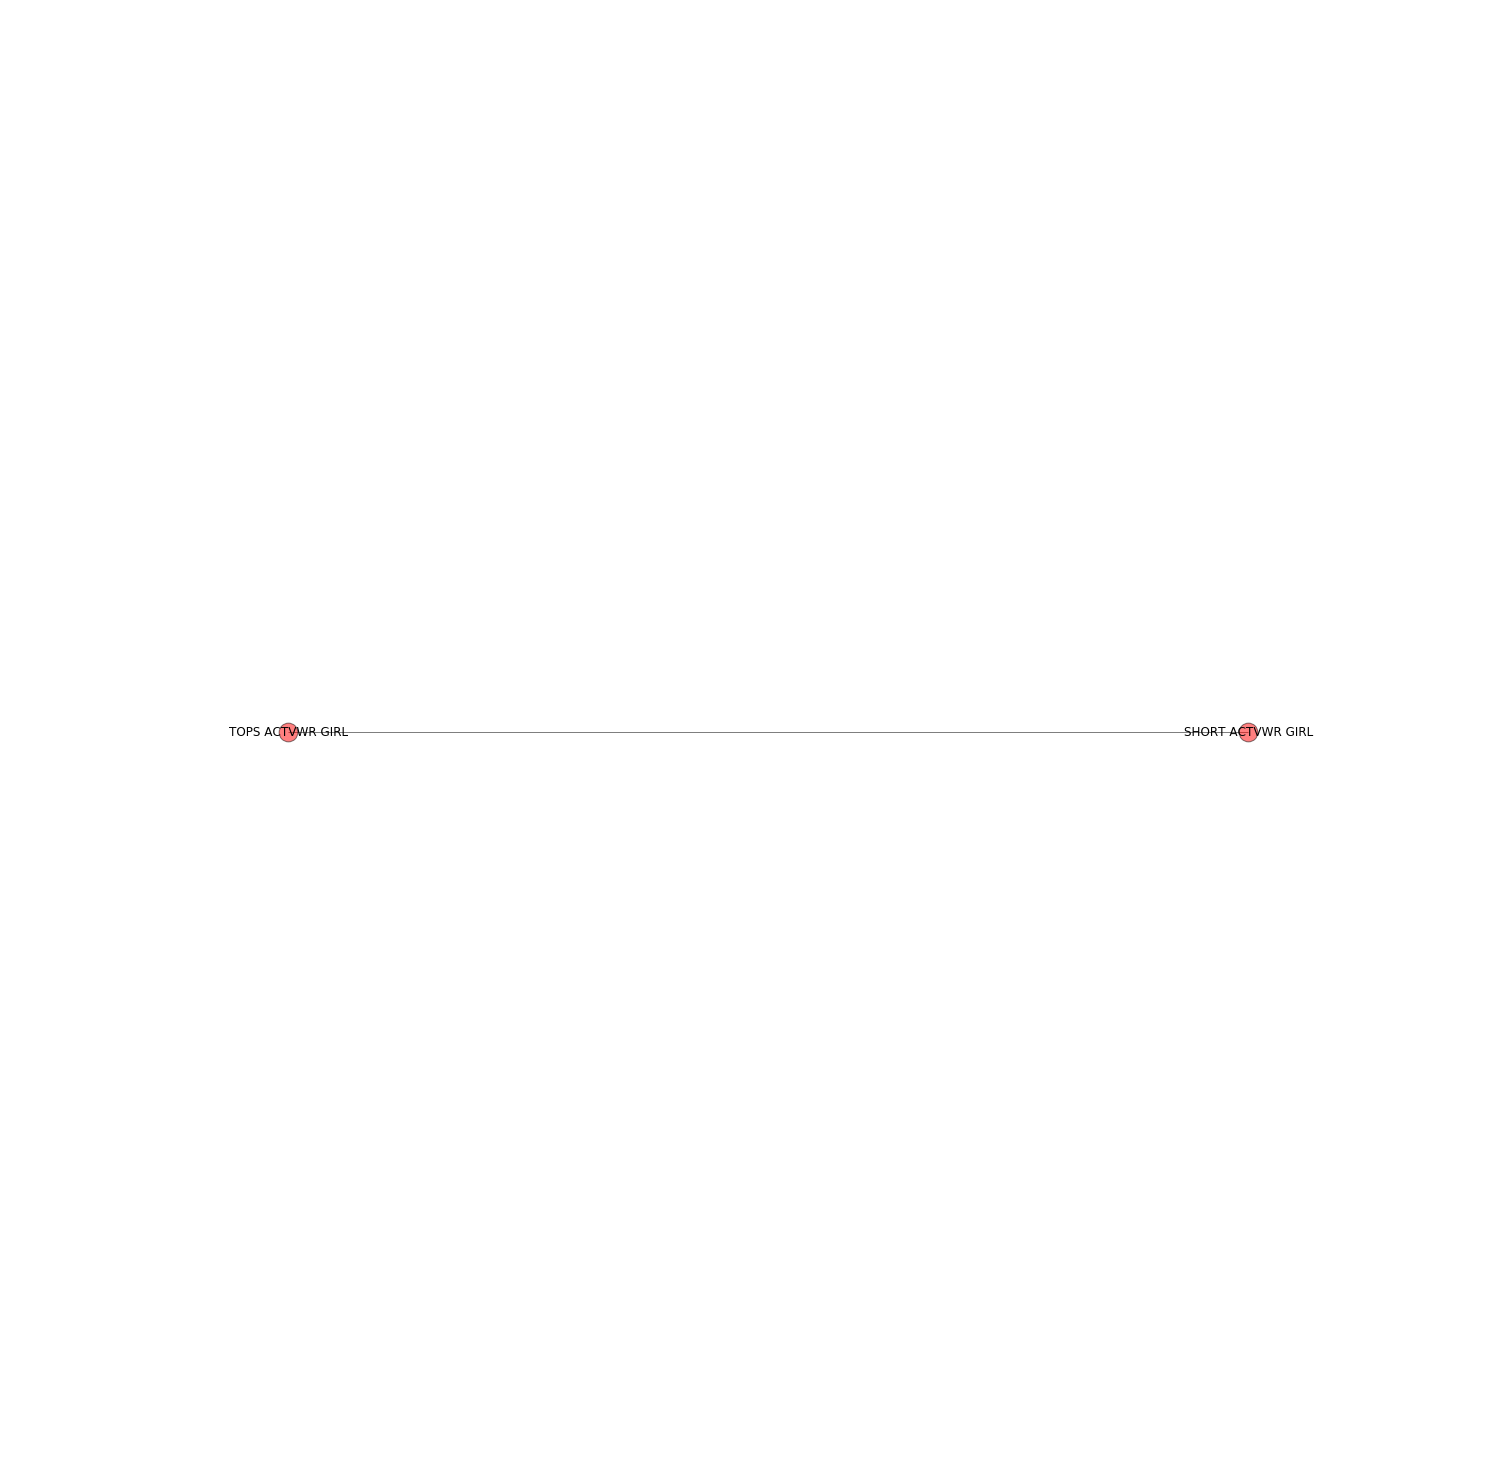

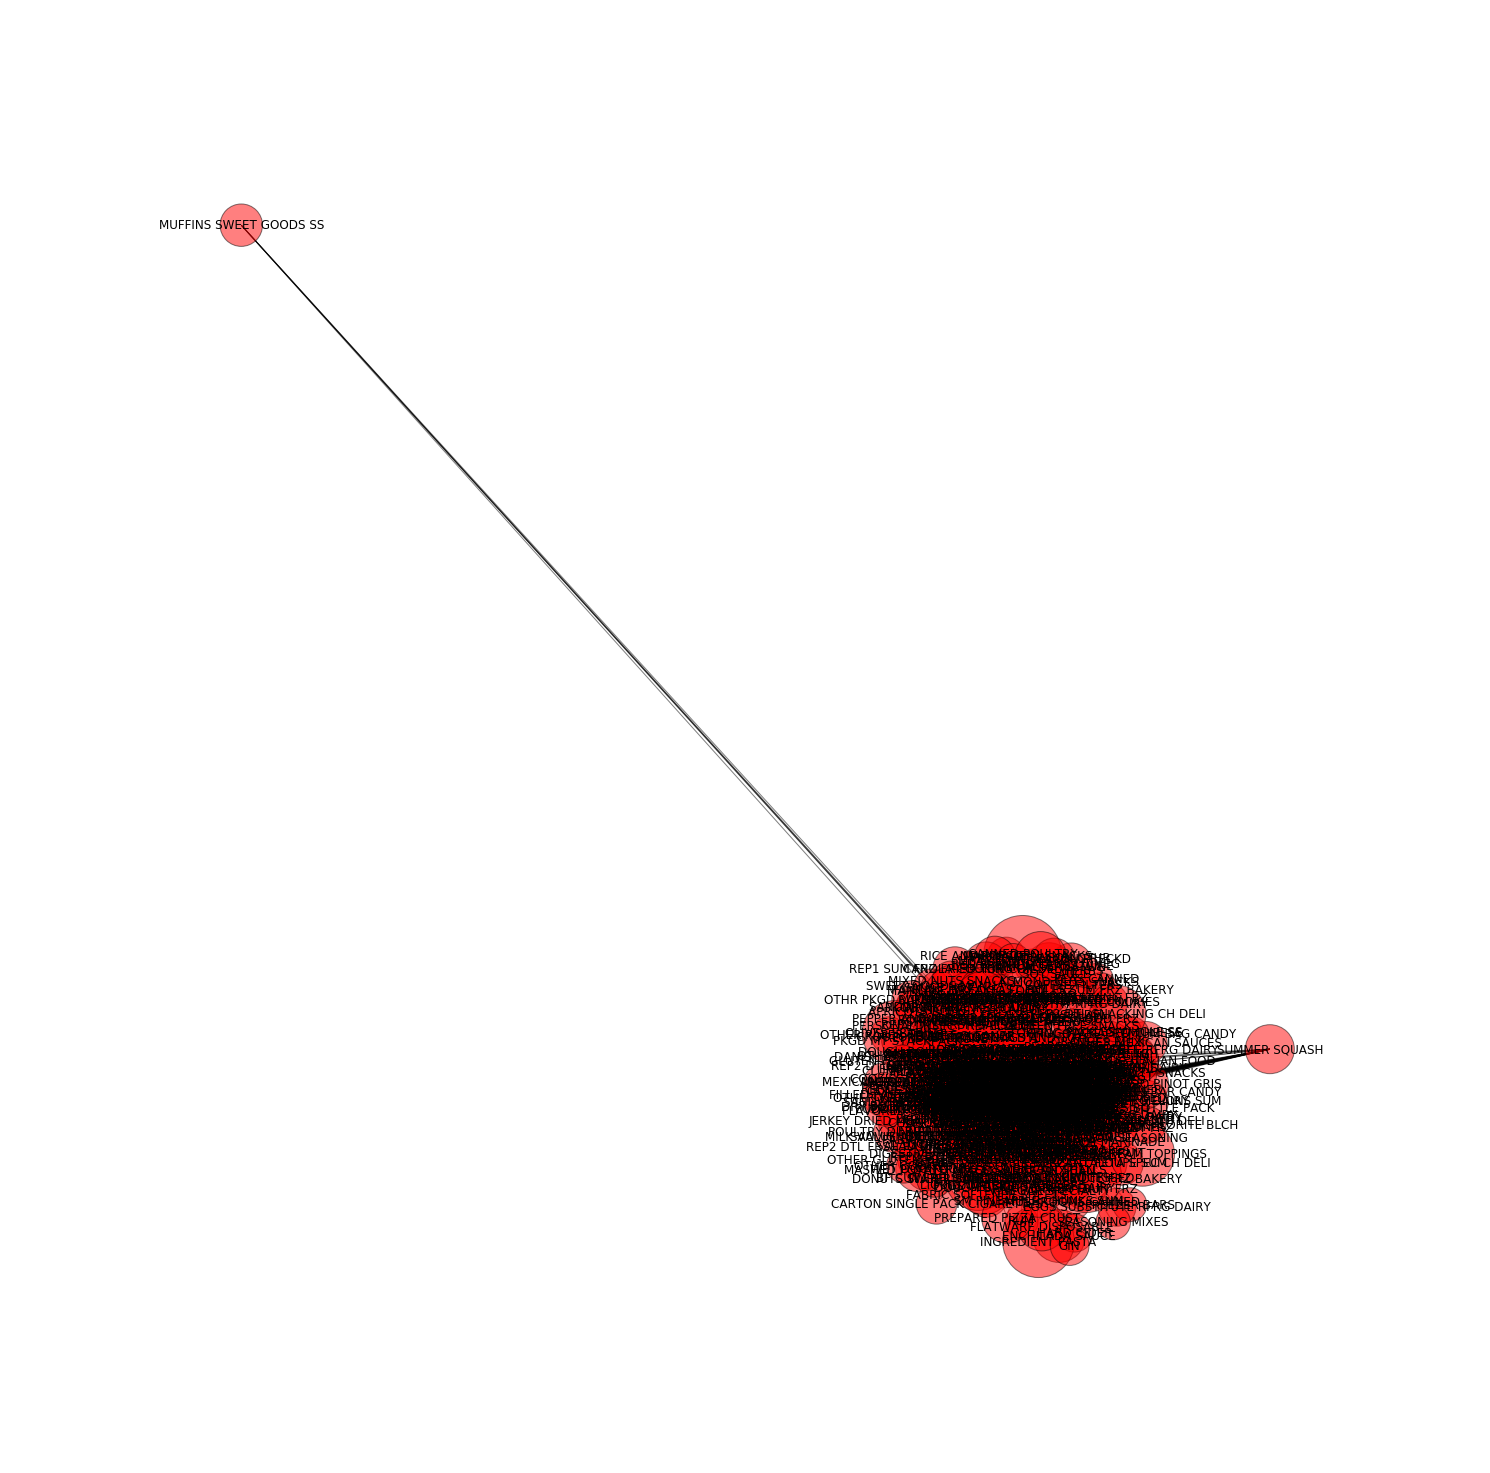

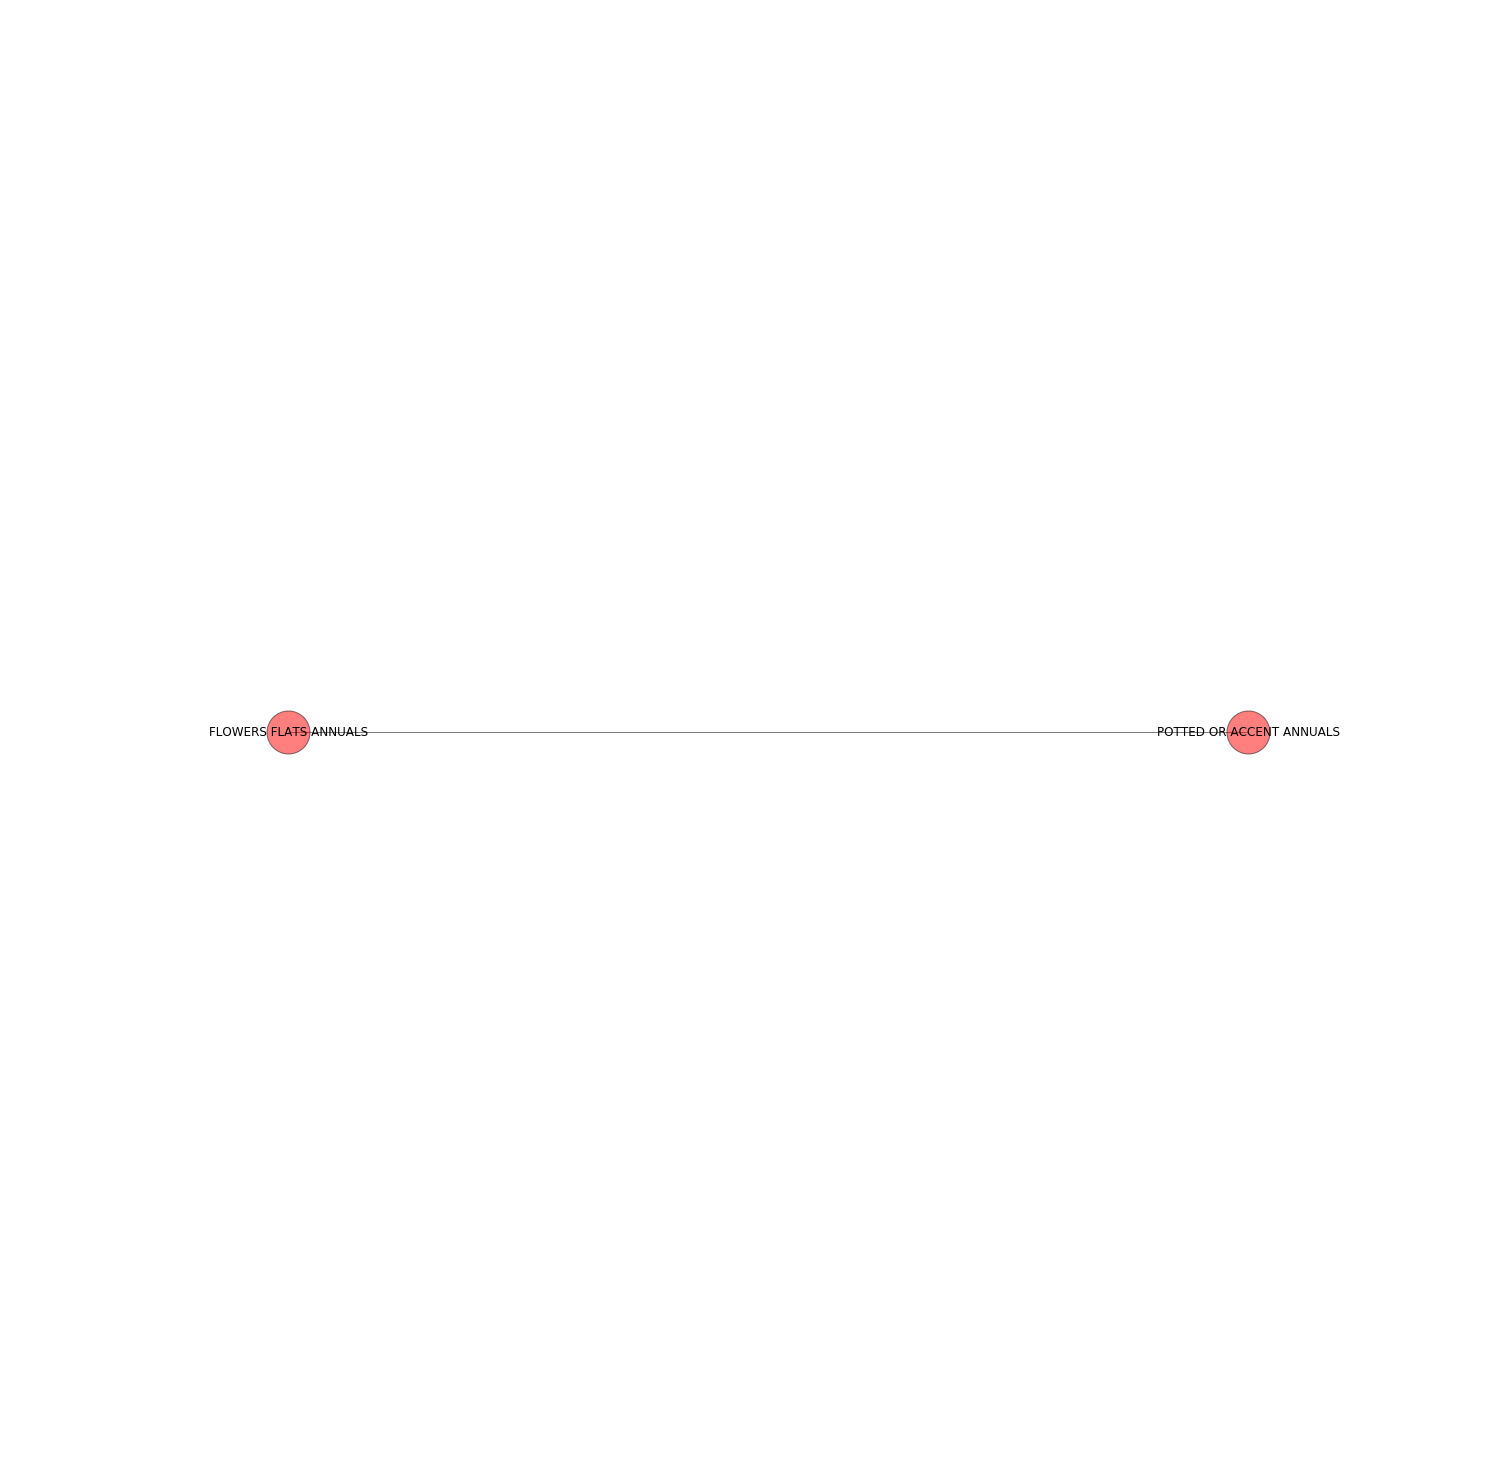

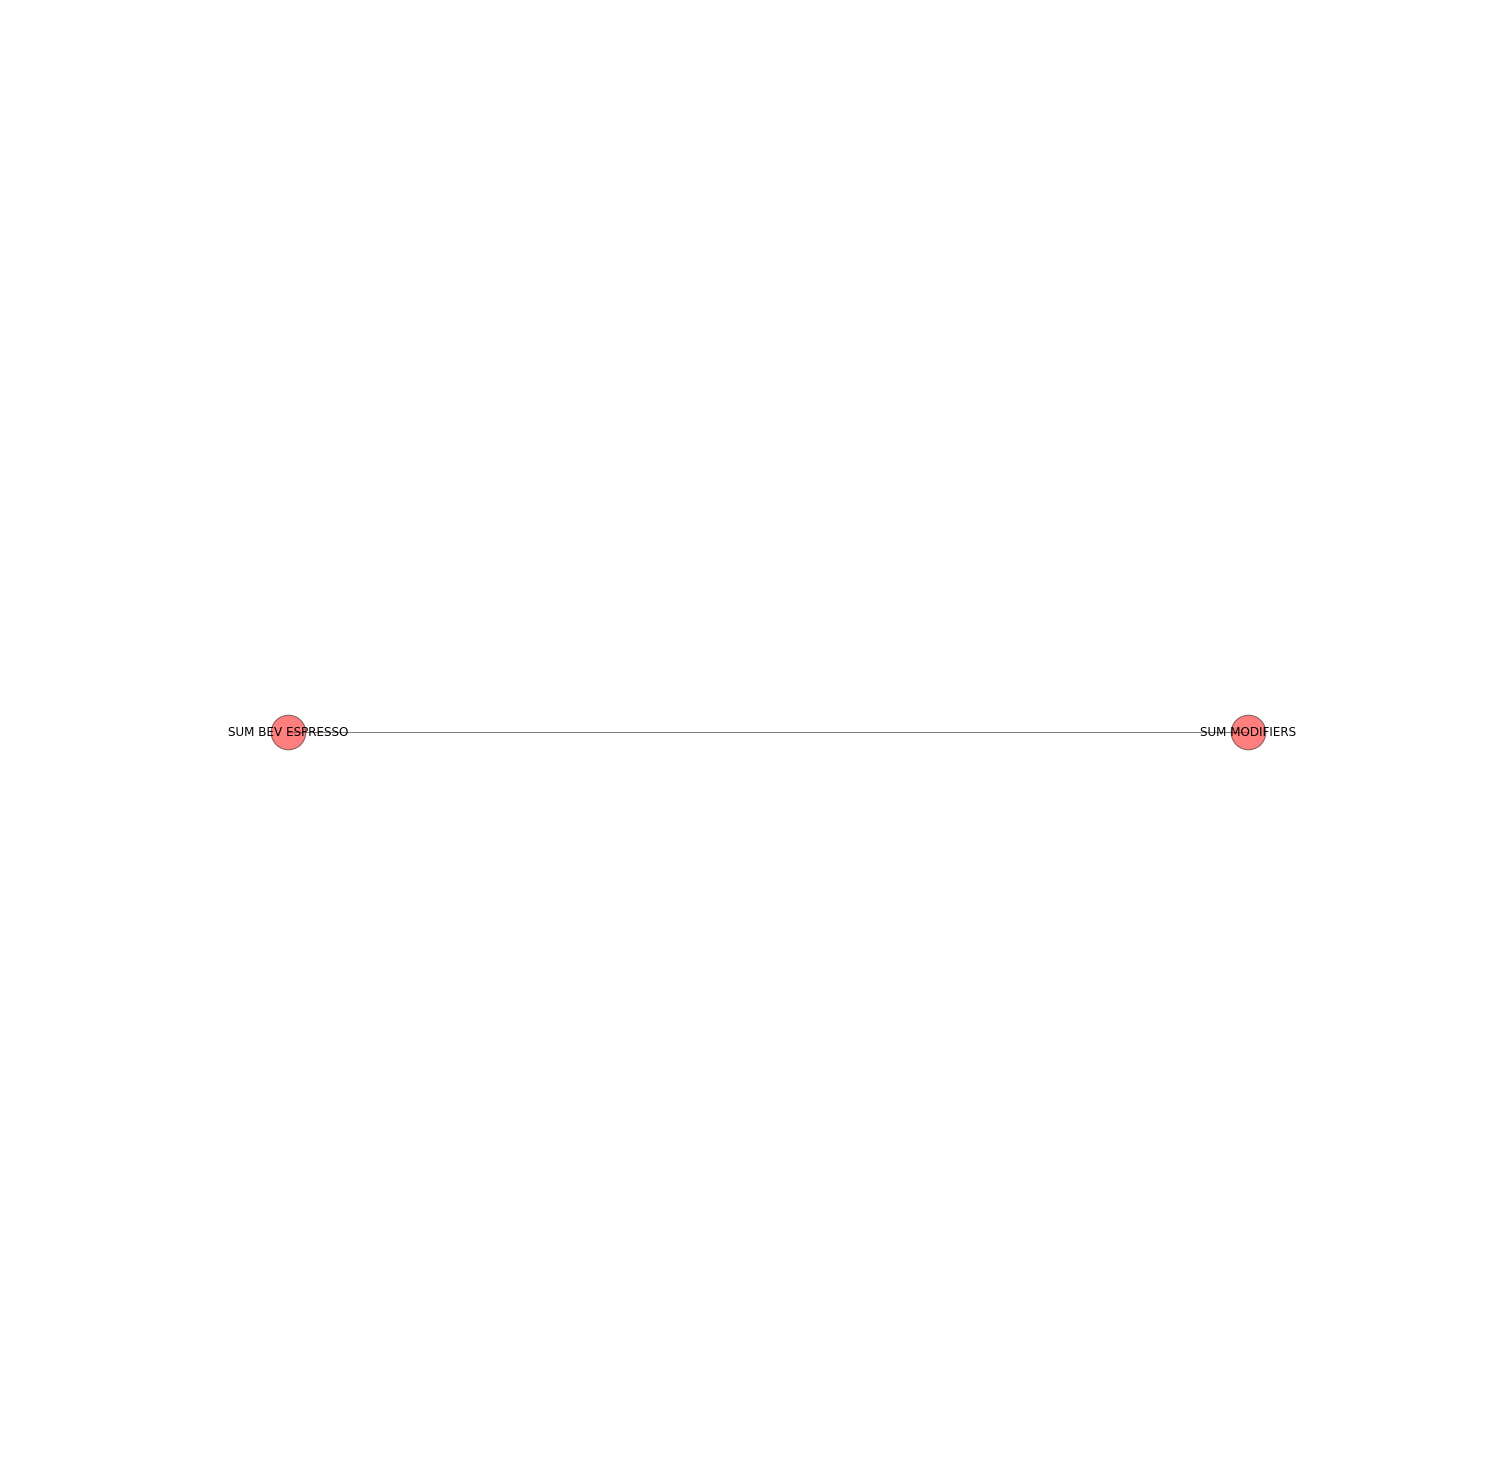

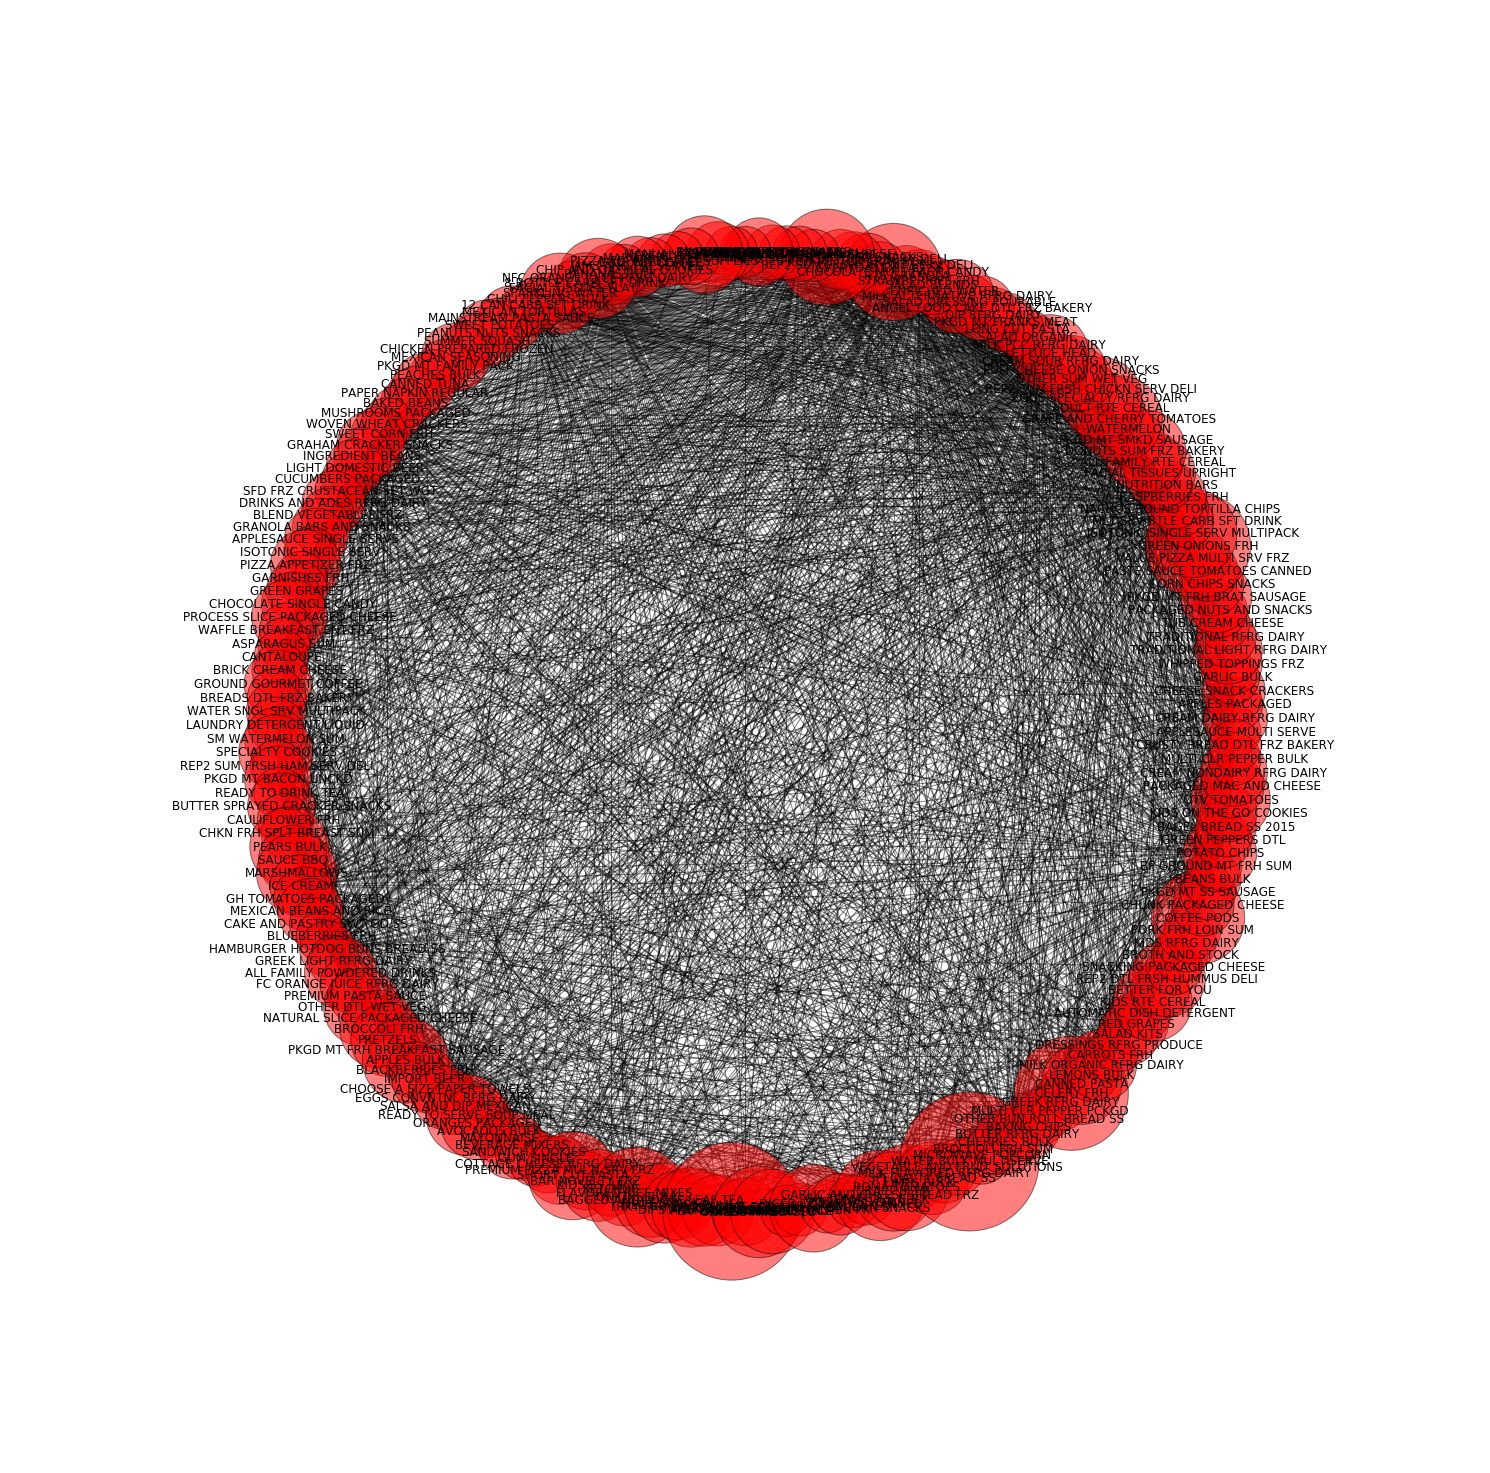

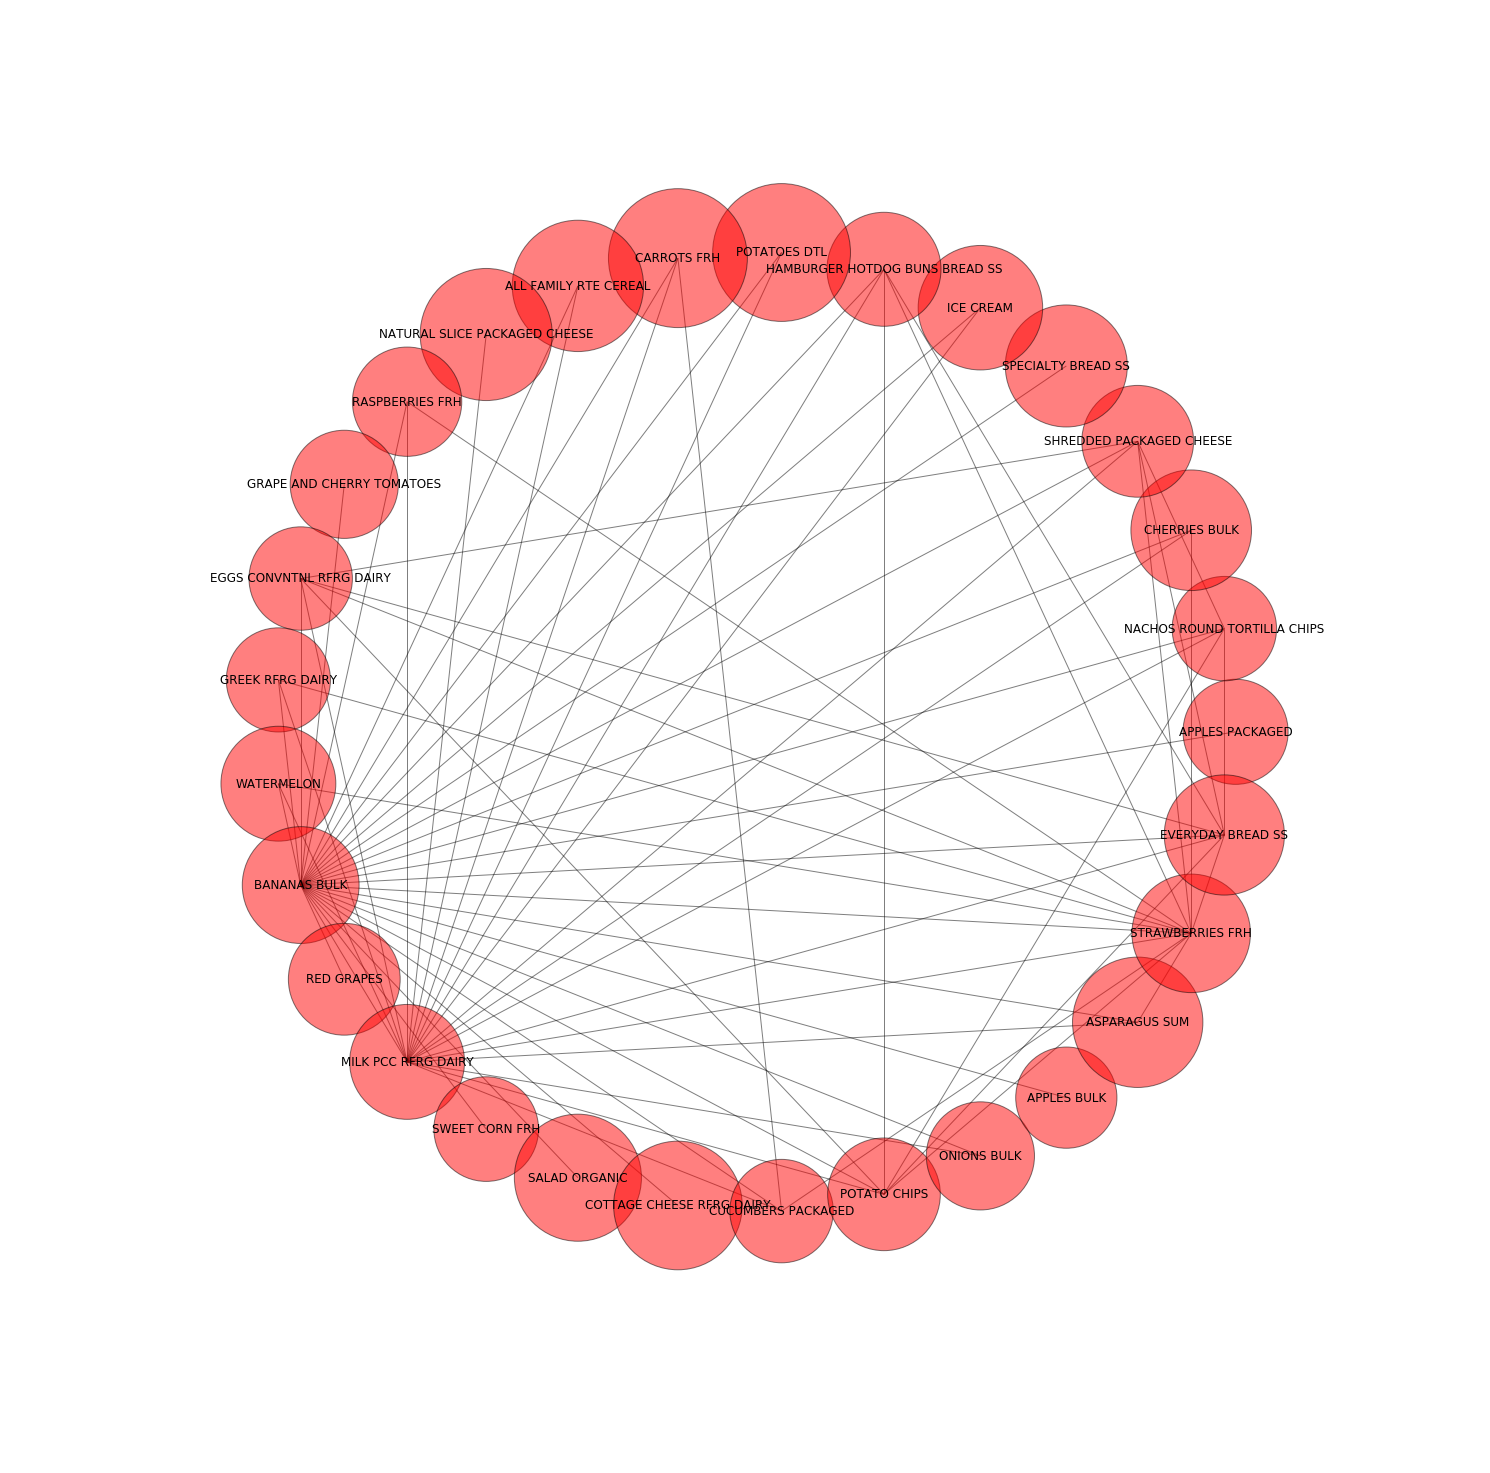

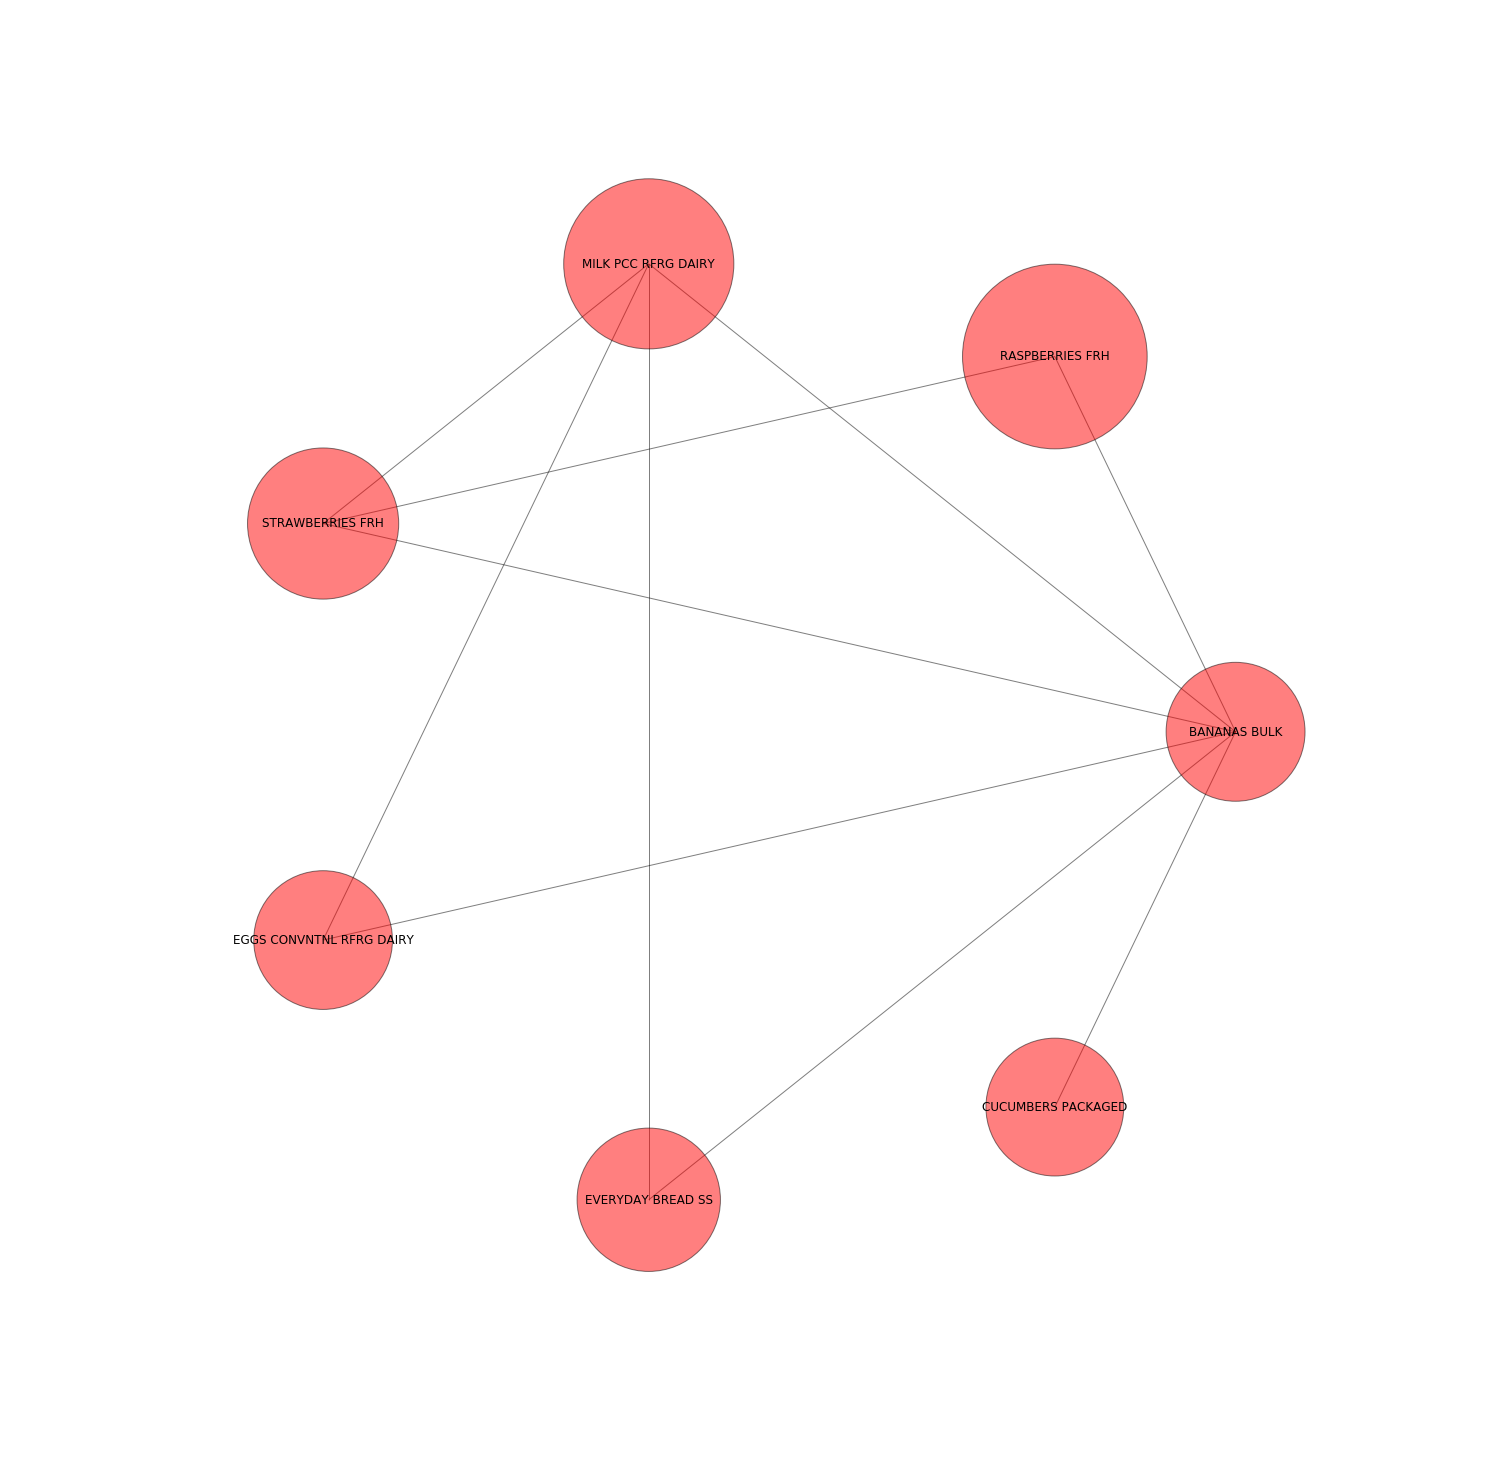

In [39]:
displayIslands(islands)

In [132]:
prod[prod.order_id.isin(prod[prod.product_desc=='ATHL SHOE BOY'].order_id.tolist())].sort_values(by='order_id')

order_id  product_id            product_desc  \
4215    11132214     2347473         KIDS RTE CEREAL   
96297   11132214      522110     ALL FAMILY SS JUICE   
94229   11132214      797626         NON-COFFEE PODS   
92382   11132214     1202760  FABRIC SOFTENER SHEETS   
87589   11132214     2704824  CONDENSED SOUP COOKING   
81742   11132214     3186371              US WHISKEY   
67794   11132214      445257         BEVERAGE MIXERS   
64852   11132214     2944654           ATHL SHOE BOY   
64601   11132214      345293    PAPER NAPKIN REGULAR   
123401  11132214     2767401    WILD BIRD MIXED SEED   
37266   11132214     1261023             COFFEE PODS   
16677   11132214      482179              SPRINKLERS   
41610   11132214     3428874        VODKA UNFLAVORED   
83554   11946400     2337289       REG FIT JEANS MEN   
53018   11946400     1847268        RUNNING SHOE MEN   
121031  11946400      690350     FACIAL TISSUES FLAT   
42844   11946400     2942776  BOXER BRIEF BOY UNDRWR   
66857   11946400     2944654           ATHL SHOE BOY   
72786   12704296      432629                HAMMOCKS   
66811   12704296     2525275             SKIRTS GIRL   
33219   12704296     1906278        TOPS ACTVWR GIRL   
64880   12704296     2942776  BOXER BRIEF BOY UNDRWR   
101721  12704296     1421993  LWCT NO SHOW SOCK GIRL   
104186  12704296     2944654           ATHL SHOE BOY   
55225   12961566     2168659       NONCHOC BAG CANDY   
30671   12961566      660709     PIZZA APPETIZER FRZ   
107861  12961566      537614     POCKET SANDWICH FRZ   
110770  12961566     2944654           ATHL SHOE BOY   

                             cat_desc  
4215              READY TO EAT CEREAL  
96297      JUICES AND JUICE DRINKS SS  
94229                     COFFEE PODS  
92382                 FABRIC SOFTENER  
87589                  CONDENSED SOUP  
81742                         WHISKEY  
67794                 BEVERAGE MIXERS  
64852                   KIDS ATHLETIC  
64601                    PAPER NAPKIN  
123401      WILDBIRD FEEDERS AND FOOD  
37266                     COFFEE PODS  
16677     GARDEN HOSES AND SPRINKLERS  
41610                           VODKA  
83554                      JEANS MENS  
53018              RUNNING SHOES MENS  
121031                 FACIAL TISSUES  
42844                  KIDS UNDERWEAR  
66857                   KIDS ATHLETIC  
72786   OUTDOOR FURNITURE ACCESSORIES  
66811                   BOTTOMS GIRLS  
33219                ACTIVEWEAR GIRLS  
64880                  KIDS UNDERWEAR  
101721                     KIDS SOCKS  
104186                  KIDS ATHLETIC  
55225              CANDY NONCHOCOLATE  
30671                FROZEN APPETIZER  
107861                FROZEN SANDWICH  
110770                  KIDS ATHLETIC

In [134]:
prod[prod.order_id.isin(prod[prod.product_desc=='PLATES DINNER'].order_id.tolist())].sort_values(by='order_id')

order_id  product_id                   product_desc  \
31513   11388431      156462  REP2 DTL CHEDDAR SPEC CH DELI   
31826   11388431     2900642  REP2 DTL FRSH DRY MT PRS DELI   
39764   11388431      358673         GADGETS SERVING PIECES   
49129   11388431      571878                  PLATES DINNER   
55575   11388431     2196361                     CRAFT BEER   
66918   11388431     2777011               MULTI PACKS BATH   
77928   11388431     1564058         BOWLS SMALL INDIVIDUAL   
1091    11575709      982805         TABLE LINENS PLACEMATS   
9078    11575709     1563828          SUMMER PLACE SETTINGS   
9079    11575709     2411779                  LEGGINGS GIRL   
12049   11575709      950883        LIGHTING RPLCMNT SHADES   
17808   11575709     1702777                   TOILET PAPER   
25798   11575709      571878                  PLATES DINNER   
64610   11575709      890818                       DOG TOYS   
101270  11575709     1564058         BOWLS SMALL INDIVIDUAL   
109547  11575709      549698            SHORT SLV KNIT GIRL   

                              cat_desc  
31513            DELI SPECIALTY CHEESE  
31826   DELI PRESLICED MEAT AND CHEESE  
39764                  KITCHEN GADGETS  
49129                       DINNERWARE  
55575       ABOVE PREMIUM QUALITY BEER  
66918                      BATH TOWELS  
77928                       DINNERWARE  
1091                      TABLE LINENS  
9078                 SEASONAL TABLETOP  
9079                     BOTTOMS GIRLS  
12049                         LIGHTING  
17808                     TOILET PAPER  
25798                       DINNERWARE  
64610         DOG TOYS AND ACCESSORIES  
101270                      DINNERWARE  
109547                      TOPS GIRLS

# Centrality By Product Category

In [80]:
df[df.type=='product'].groupby(['cat_desc']).mean().sort_values(by='pagerank_op',ascending=False).head(20)

degree_centrality_op  pagerank_op
cat_desc                                                        
CIGARETTES                               552.000000     0.011349
BANANAS                                 2140.000000     0.005717
DELI BEVERAGE                            346.000000     0.005383
ALTERNATIVE BEVERAGE                     334.333333     0.003184
WATER                                    464.333333     0.003108
CHERRIES                                 871.000000     0.002641
MILK CONVNTNL RFRG DAIRY                 929.500000     0.002637
EGGS CONVNTNL RFRG DAIRY                1096.000000     0.002449
ICE                                      155.500000     0.002148
ABOVE PREMIUM QUALITY BEER               298.000000     0.001904
BREAD SS                                 784.000000     0.001891
PREMIUM QUALITY BEER                     233.000000     0.001812
ENHANCED WATER                           303.000000     0.001684
CARBONATED SOFT DRINKS                   247.636364     0.001551
CUCUMBERS                                879.000000     0.001520
FRANCHISE BEVERAGE                        72.125000     0.001467
CANDY GUM AND MINTS SINGLE               182.750000     0.001424
BERRIES                                  577.600000     0.001419
SHREDS AND CHUNKS PKGD CHEESE            691.500000     0.001282
COFFEE CREAMER RFRG DAIRY                365.500000     0.000960

In [ ]:
#import pyvttbl 
#import DataFrame
#cats = df[df.type=='product'].cat_desc.astype(str).tolist()
#dc = df[df.type=='product'].degree_centrality_op.astype(float).tolist()
#dc = [ i.item() for i in dc]
#dfp=pyvttbl.DataFrame(cat_desc = cats ,degree_centrality_op = dc)
#dfp=pyvttbl.DataFrame(cat_desc = ['a','b','a','a','b','b'],degree_centrality_op = [0.1,0.5,0.9,0.2,0.6,1.0])

#df.read_tbl(datafile)
#aov_pyvttbl = dfp.anova1way('degree_centrality_op', 'cat_desc')
#print aov_pyvttbl


#df[df.type=='product'].anova1way('pagerank_op', 'cat_desc')